In [1]:
from random import shuffle
from random import randint
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from operator import itemgetter
import time
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

import gc

In [ ]:
XGBoost_data = pd.read_csv('Dane_scrapowanie/Final_data/ML_data.csv')

In [3]:
XGBoost_data

,required_age,controller_support,dlc,website,demos,platforms,achievements,english,price,recommendations_total,...,Steam_Leaderboards,Steam_Trading_Cards,Steam_Turn_Notifications,Steam_Workshop,SteamVR_Collectibles,Tracked_Controller_Support,VR_Only,VR_Support,VR_Supported,Valve_AntiCheat_enabled
0,0,0,0,0,0,0,0,1,35.99,135326,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,17.99,5319,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,17.99,3595,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,17.99,1844,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,17.99,14880,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52915,0,0,0,0,0,1,10,1,15.33,0,...,0,0,0,0,0,0,0,0,0,0
52916,0,0,0,0,0,1,0,1,17.99,0,...,0,0,0,0,0,0,0,0,0,0
52917,0,0,0,0,0,1,48,1,4.49,0,...,0,0,0,0,0,0,0,0,0,0
52918,0,0,0,0,0,1,0,1,32.97,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
XGBoost_data.columns

Index(['required_age', 'controller_support', 'dlc', 'website', 'demos',
       'platforms', 'achievements', 'english', 'price',
       'recommendations_total', 'positive', 'negative', 'average_forever',
       'rating', 'Action', 'Free_to_Play', 'Strategy', 'Adventure', 'Indie',
       'Animation__Modeling', 'Video_Production', 'RPG', 'Casual',
       'Simulation', 'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent',
       'Sports', 'Early_Access', 'Gore', 'Design__Illustration', 'Education',
       'Web_Publishing', 'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days', 'score_publishers', 'score_developers',
       'age_restriction', 'Captions_available', 'Coop', 'Commentary_available',
       'Cross_Platform_Multiplayer', 'Full_controller_support',
       'InApp_Purchases', 'Includes_Source_SDK', 'Includes_level_editor',
       'LAN_Coop', 'LAN_PvP', 'MMO', 'Mods', 'requir

In [7]:
XGBoost_data = XGBoost_data.drop('required_age',axis=1)
XGBoost_data = XGBoost_data.drop('negative',axis=1)
XGBoost_data = XGBoost_data.drop('positive',axis=1)

In [8]:
XGBoost_data['controller_support'].value_counts()

0    41310
1    11610
Name: controller_support, dtype: int64

In [10]:
XGBoost_data['Full_controller_support'].value_counts()

0    41310
1    11610
Name: Full_controller_support, dtype: int64

In [11]:
XGBoost_data = XGBoost_data.drop('Full_controller_support',axis=1)

In [14]:
XGBoost_data['Massively_Multiplayer'].value_counts()

0    51694
1     1226
Name: Massively_Multiplayer, dtype: int64

In [13]:
XGBoost_data['MMO'].value_counts()

In [64]:
XGBoost_data = XGBoost_data.drop('game_age_days',axis=1)

In [65]:
XGBoost_data.to_csv("Dane_scrapowanie/Final_data/ML_data2.csv", index=False)

In [15]:
target = 'rating'#'rating', 'game_age_days', 'rating', 'game_age_days',
features = ['controller_support', 'dlc', 'website', 'demos', 'platforms',
       'achievements', 'english', 'price', 'recommendations_total',
       'average_forever', 'Action', 'Free_to_Play', 'Strategy',
       'Adventure', 'Indie', 'Animation__Modeling', 'Video_Production', 'RPG',
       'Casual', 'Simulation', 'Racing', 'Massively_Multiplayer', 'Nudity',
       'Violent', 'Sports', 'Early_Access', 'Gore', 'Design__Illustration',
       'Education', 'Web_Publishing', 'Game_Development', 'Utilities',
       'Software_Training', 'Audio_Production', 'Photo_Editing',
       'Sexual_Content', 'Movie', 'Accounting', 
       'score_publishers', 'score_developers', 'age_restriction',
       'Captions_available', 'Coop', 'Commentary_available',
       'Cross_Platform_Multiplayer', 'InApp_Purchases', 'Includes_Source_SDK',
       'Includes_level_editor', 'LAN_Coop', 'LAN_PvP', 'MMO', 'Mods',
       'require_HL2', 'Multi_player', 'Online_coop', 'Online_PvP',
       'Partial_Controller_Support', 'PvP', 'Remote_Play_Together',
       'Remote_Play_on_Phone', 'Remote_Play_on_TV', 'Remote_Play_on_Tablet',
       'Shared_Split_Screen', 'Shared_Split_Screen_Coop',
       'Shared_Split_Screen_PvP', 'Single_player', 'Stats',
       'Steam_Achievements', 'Steam_Cloud', 'Steam_Leaderboards',
       'Steam_Trading_Cards', 'Steam_Turn_Notifications', 'Steam_Workshop',
       'SteamVR_Collectibles', 'Tracked_Controller_Support', 'VR_Only',
       'VR_Support', 'VR_Supported', 'Valve_AntiCheat_enabled']
#variances = ['required_age','developers_encoded_k10', 'publishers_encoded_k10']
#catFeatures = ['developers', 'publishers','categories']
#deleteFeatures = ['developers', 'publishers','categories']

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Example data

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(features, target)

# Make predictions
predictions = model.predict(features)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(target, predictions))

print("RMSE:", rmse)


ValueError: Expected 2D array, got 1D array instead:
array=['controller_support' 'dlc' 'website' 'demos' 'platforms' 'achievements'
 'english' 'price' 'recommendations_total' 'average_forever' 'Action'
 'Free_to_Play' 'Strategy' 'Adventure' 'Indie' 'Animation__Modeling'
 'Video_Production' 'RPG' 'Casual' 'Simulation' 'Racing'
 'Massively_Multiplayer' 'Nudity' 'Violent' 'Sports' 'Early_Access' 'Gore'
 'Design__Illustration' 'Education' 'Web_Publishing' 'Game_Development'
 'Utilities' 'Software_Training' 'Audio_Production' 'Photo_Editing'
 'Sexual_Content' 'Movie' 'Accounting' 'score_publishers'
 'score_developers' 'age_restriction' 'Captions_available' 'Coop'
 'Commentary_available' 'Cross_Platform_Multiplayer' 'InApp_Purchases'
 'Includes_Source_SDK' 'Includes_level_editor' 'LAN_Coop' 'LAN_PvP' 'MMO'
 'Mods' 'require_HL2' 'Multi_player' 'Online_coop' 'Online_PvP'
 'Partial_Controller_Support' 'PvP' 'Remote_Play_Together'
 'Remote_Play_on_Phone' 'Remote_Play_on_TV' 'Remote_Play_on_Tablet'
 'Shared_Split_Screen' 'Shared_Split_Screen_Coop'
 'Shared_Split_Screen_PvP' 'Single_player' 'Stats' 'Steam_Achievements'
 'Steam_Cloud' 'Steam_Leaderboards' 'Steam_Trading_Cards'
 'Steam_Turn_Notifications' 'Steam_Workshop' 'SteamVR_Collectibles'
 'Tracked_Controller_Support' 'VR_Only' 'VR_Support' 'VR_Supported'
 'Valve_AntiCheat_enabled'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# RMSE pierwsze

wrapper

In [97]:
xgb.set_config(verbosity=0)
# Increase the size of the importance plot
def run_xgb(train, validate, features, target, # argumenty obowiązkowe
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7, # hiperparametry
            colsample_bylevel=1, reg_lambda=1, alpha=0, gamma=0, min_child_weight=0, rate_drop = 0, skip_drop=0, # hiperparametry #
            num_boost_round = 1000, early_stopping_rounds = 30, # hiperparametry
            debug=True, eval_metric= ["rmse"], objective = "reg:squarederror", # konfiguracja
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise", verbosity = 0, silent=True,): # konfiguracja


    '''
    Uniwersalny wrapper dla XGB dla gbtree i dart
    Więcej opcji https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
    
    Parametry
    ----------
    train, validate, features, target : wymagane zmienne bez domyślnych wartości
    train, validate : pd.DataFrames z kolumnami opisanymi w features i target
    features : lista zmiennych do wykorzystania w trenowaniu
    target : nazwa zmiennej objasnianej
    
    --- Zmienne wspólne dla gbtree i dart
        --- Zmienne właściwe dla Ensamble/Boosting
        eta : "learning rate"
        max_depth=7 : maksymalna głębokość drzew [0,∞]
        subsample : udział (0,1] obserwacji do treningu jednej iteracji
        colsample_bytree : udział (0,1] kolumn do treningu jednej iteracji
        colsample_bylevel : udział  (0,1] kolumn na poziom do treningu jednej iteracji
        --- Zmienne regularyzacyjne
        reg_lambda=0 : regularyzacja L2 [0,∞]
        alpha=0 : regularyzacja L1 [0,∞]
        gamma=1 : minimalna redukcja funkcji straty
        min_child_weight=0 : minimalna suma wg poddrzewa

    --- Zmienne dla algorytmu dart

    
    --- Zmienne dla XGB, opis/agorytm/liczba drzew etc.
    num_boost_round : maksymalna liczba iteracji
    early_stopping_rounds : margines iteracji dla early stopping
    debug : Czy włączyć pełne opisy.
    eval_metric : Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    objective : reg:linear, reg:logistic, binary:logistic, multi:softmax lub inne Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    seed : random seed
    booster : ‘auto’, ‘exact’, ‘approx’, ‘hist’, ‘gpu_exact’, ‘gpu_hist’- silnik
    tree_method : zobacz http://xgboost.readthedocs.io/en/latest/parameter.html
    grow_policy : depthwise, lossguide
    '''
   
    start_time = time.time()
    paramList= ['eta', 'max_depth',
                'subsample', 'colsample_bytree', 'colsample_bylevel',
                'reg_lambda', 'alpha', 'gamma', 'min_child_weight', 
                'rate_drop', 'skip_drop',         'eval_metric', 'objective',
                'seed', 'booster', 'tree_method', 'grow_policy']

    # Stworzenie słownika do przekazania do XGB
    params = dict()
    for param in paramList:
        params[param]=eval(param)
    if(debug):
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    # Automatyczne przekazanie liczby klas dla wielu poziomów klasyfikacji
    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    verbosity=0

    # Przekształcenie zbiorów do struktury DMatrix
    # Struktura danych DMatrix pozwala na efektywne tworzenie drzew
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values)
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values)

    # Stworzenie listy zbiorów do ealuacji
    evals = [(dtrain, 'train'), (dvalid, 'valid')]

    # Stworzenie zmiennej słownikowej do przekazania
    train_history = dict()

    # Uruchomienie algorytmu trenującego
    gbm = xgb.train(params, dtrain, 
                num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds,
                evals=evals, evals_result=train_history, verbose_eval=debug)

    # Obliczenai statystyk i dodatkowych wartości
    score = gbm.best_score

    # Przekształcenie historii trenowania do Pandas Data Frame
    trainHistory = dict()
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    train_history = pd.DataFrame(trainHistory)

    # Zapis przewidywanych wartości dla zbioru walidacyjnego dla najlepszej (z punktu widzenia walidacji) iteracji
    trainPred = gbm.predict(dtrain, iteration_range=(0, gbm.best_iteration))
    testPred = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration))

    # Przygotowanie posortowanej listy dla wazności zmiennych, zamaist słownika
    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)
    impFig = None # Initialize impFig to None
    # Calculate the number of features that stayed and the total number of features
    total_features = len(features)
    features_that_stayed = len(imp)

    if(debug):
        print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
        print('Number of features that stayed: {}'.format(features_that_stayed))
        print('Total number of features: {}'.format(total_features))
        # Use the built-in function to visualize feature importance
        impFig, ax = plt.subplots(figsize=(20,15)) # Increase the size of the figure
        xgb.plot_importance(gbm, ax=ax, linewidth=12, height=0.5)
    
        # Save the figure to a file
        plt.savefig('feature_importance.png')

        # Plot training and validation errors
        fig, ax = plt.subplots(figsize=(20,15))
        ax.plot(train_history['train' + eval_metric[0].upper()], label='Train')
        ax.plot(train_history['valid' + eval_metric[0].upper()], label='Validation')
        ax.legend()
        ax.set_xlabel('Boosting round')
        ax.set_ylabel('RMSE')
        ax.axvline(x=gbm.best_iteration, color='r', linestyle='--', label='Early stopping')
        ax.legend()
    return score, trainPred, testPred, train_history, impFig, imp

eta 0.03, max_depth 10, subsample 0.8, colsample_bytree 0.5, colsample_bylevel 1, reg_lambda 9, alpha 0, gamma 5, min_child_weight 0, rate_drop 0, skip_drop 0, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 42336
Length valid: 10584
[0]	train-rmse:64.65067	valid-rmse:64.61982
[1]	train-rmse:62.76663	valid-rmse:62.73526
[2]	train-rmse:60.93817	valid-rmse:60.90631
[3]	train-rmse:59.16448	valid-rmse:59.13160
[4]	train-rmse:57.46800	valid-rmse:57.43676
[5]	train-rmse:55.82422	valid-rmse:55.79425
[6]	train-rmse:54.20986	valid-rmse:54.17909
[7]	train-rmse:52.67046	valid-rmse:52.64040
[8]	train-rmse:51.15726	valid-rmse:51.12793
[9]	train-rmse:49.69059	valid-rmse:49.66083
[10]	train-rmse:48.27026	valid-rmse:48.23958
[11]	train-rmse:46.89509	valid-rmse:46.86487
[12]	train-rmse:45.55444	valid-rmse:45.52224
[13]	train-rmse:44.25506	valid-rmse:44.22131
[14]	train-rmse:43.00078	valid-rmse:42.96760
[15]	train-rmse

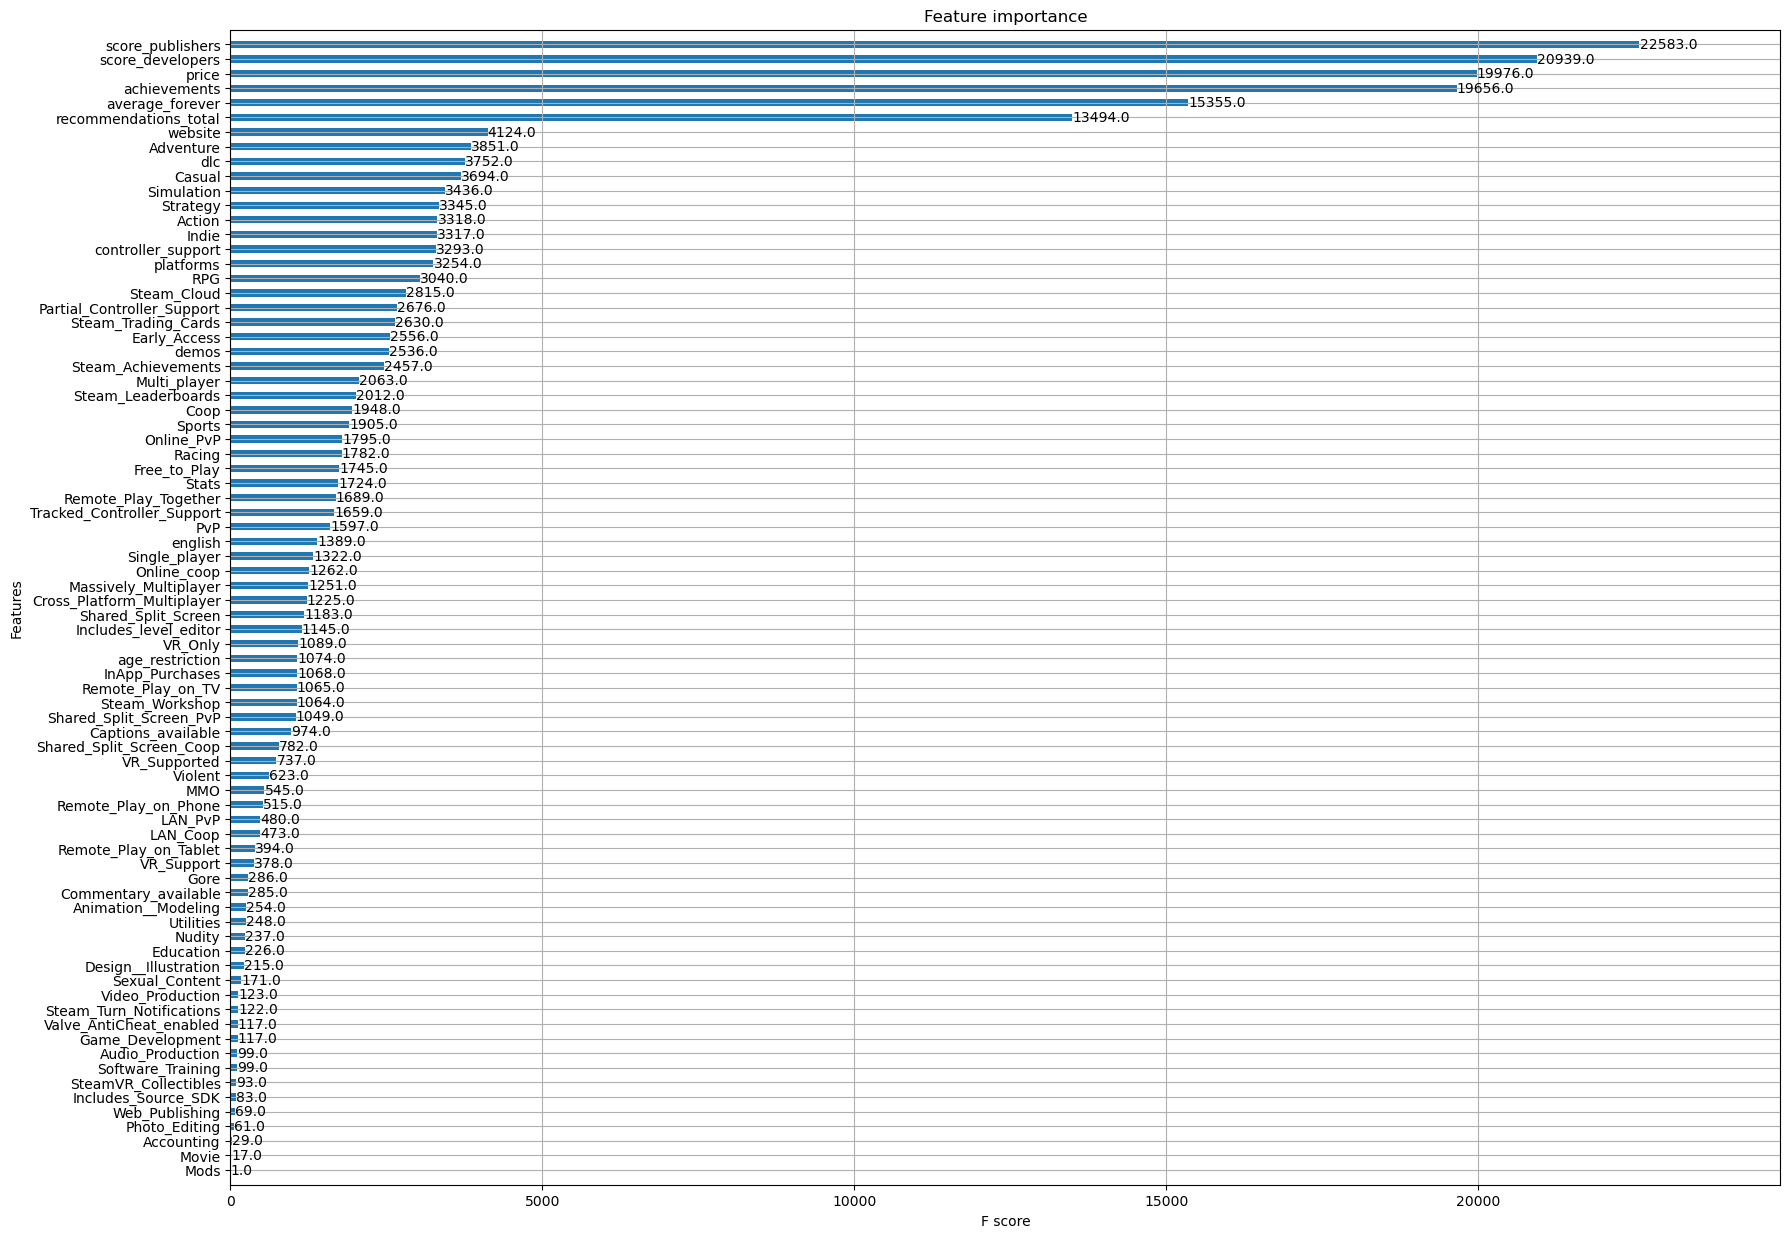

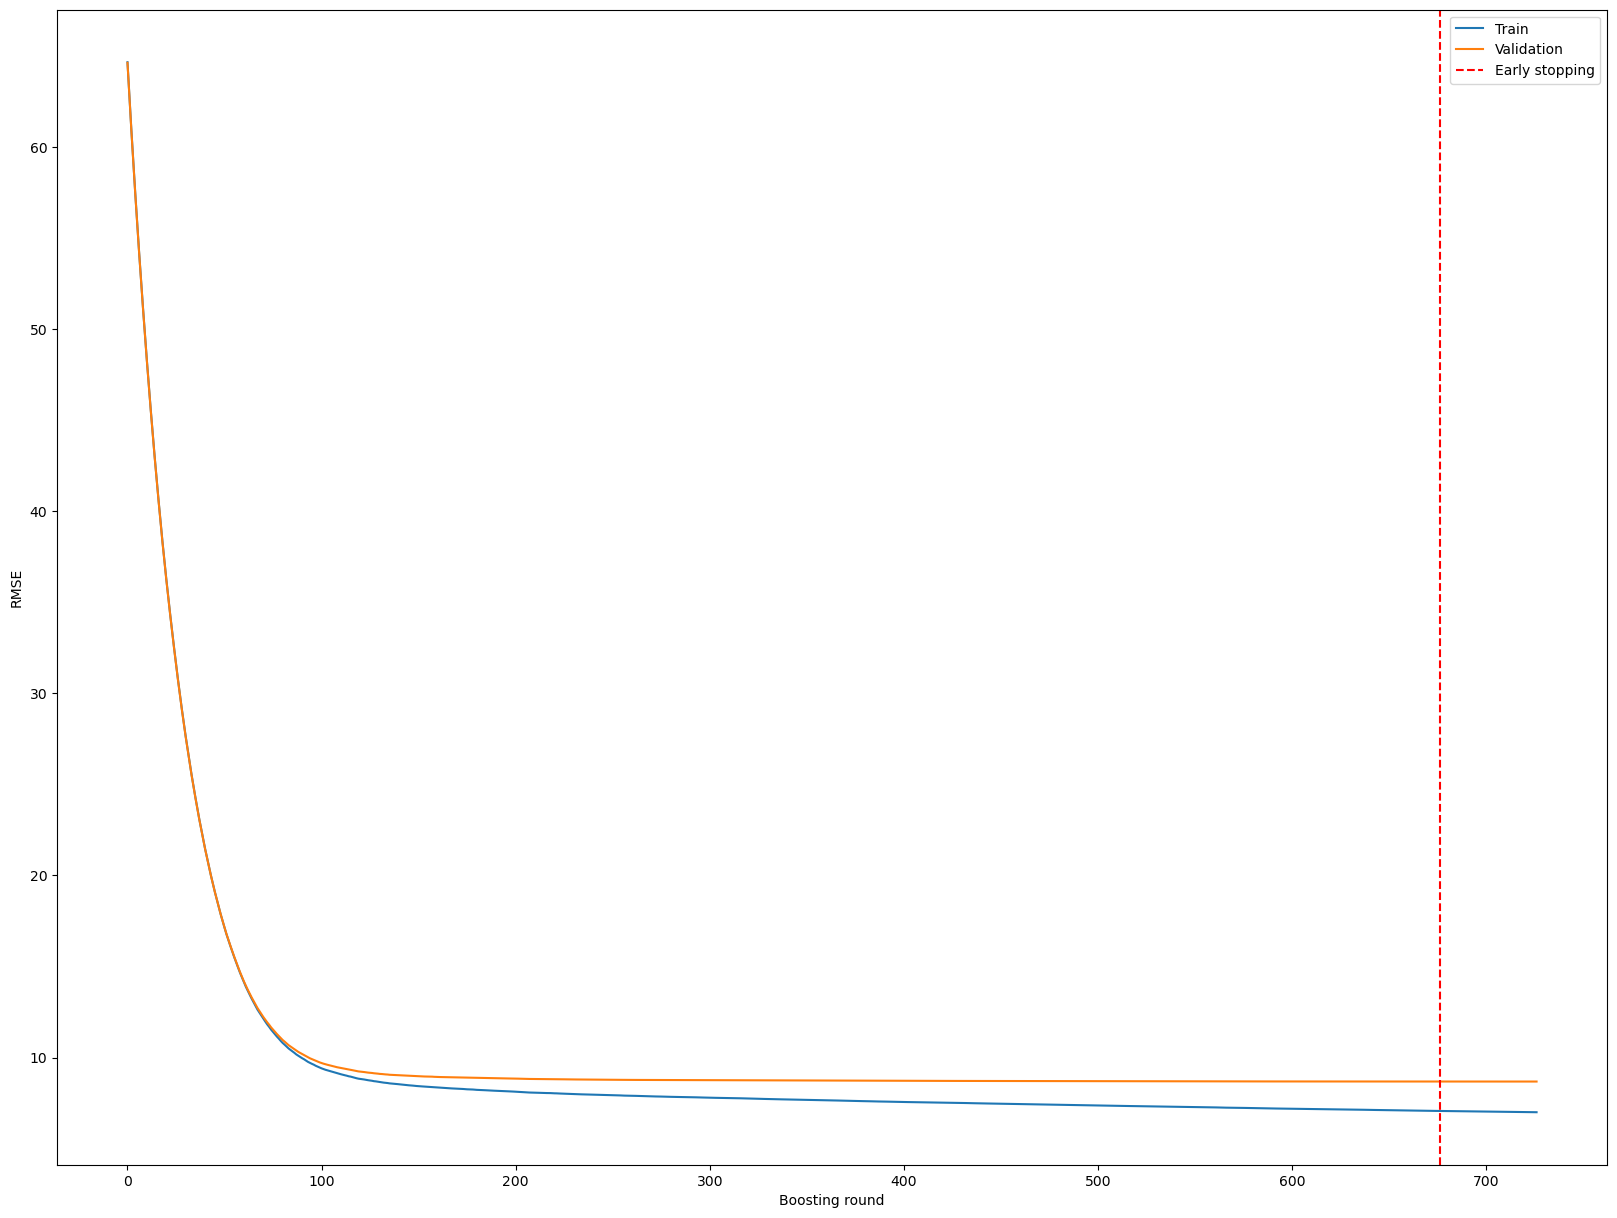

In [100]:
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets
X_train, X_valid = train_test_split(XGBoost_data, test_size=0.2, random_state=2017)

# Run the XGBoost model
score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1,reg_lambda=9,gamma=5,early_stopping_rounds=50,)

# Get the best iteration
best_iteration = train_history['validRMSE'].idxmin()

# Print the best iteration and corresponding RMSE
print("Best iteration: ", best_iteration)
print("Best RMSE for train: ", train_history['trainRMSE'][best_iteration])
print("Best RMSE for validation: ", train_history['validRMSE'][best_iteration])

# Get the names of the features that were used in the model
used_features = [feature[0] for feature in imp]

# Get the names of the features that were removed
removed_features = list(set(features) - set(used_features))

# Print the names of the removed features
print("Removed features: ", removed_features)

eta 0.03, max_depth 7, subsample 0.7, colsample_bytree 0.7, colsample_bylevel 1, reg_lambda 1, alpha 0, gamma 0, min_child_weight 0, rate_drop 0, skip_drop 0, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 42336
Length valid: 10584
[0]	train-rmse:64.64652	valid-rmse:64.61430
[1]	train-rmse:62.75594	valid-rmse:62.72188
[2]	train-rmse:60.92065	valid-rmse:60.88547
[3]	train-rmse:59.14296	valid-rmse:59.10657
[4]	train-rmse:57.44120	valid-rmse:57.40536
[5]	train-rmse:55.77534	valid-rmse:55.74015
[6]	train-rmse:54.15676	valid-rmse:54.12193
[7]	train-rmse:52.60677	valid-rmse:52.57316
[8]	train-rmse:51.08955	valid-rmse:51.05645
[9]	train-rmse:49.61758	valid-rmse:49.58533
[10]	train-rmse:48.18313	valid-rmse:48.14894
[11]	train-rmse:46.80351	valid-rmse:46.76879
[12]	train-rmse:45.45784	valid-rmse:45.42230
[13]	train-rmse:44.15471	valid-rmse:44.11950
[14]	train-rmse:42.89590	valid-rmse:42.86070
[15]	train-rmse:

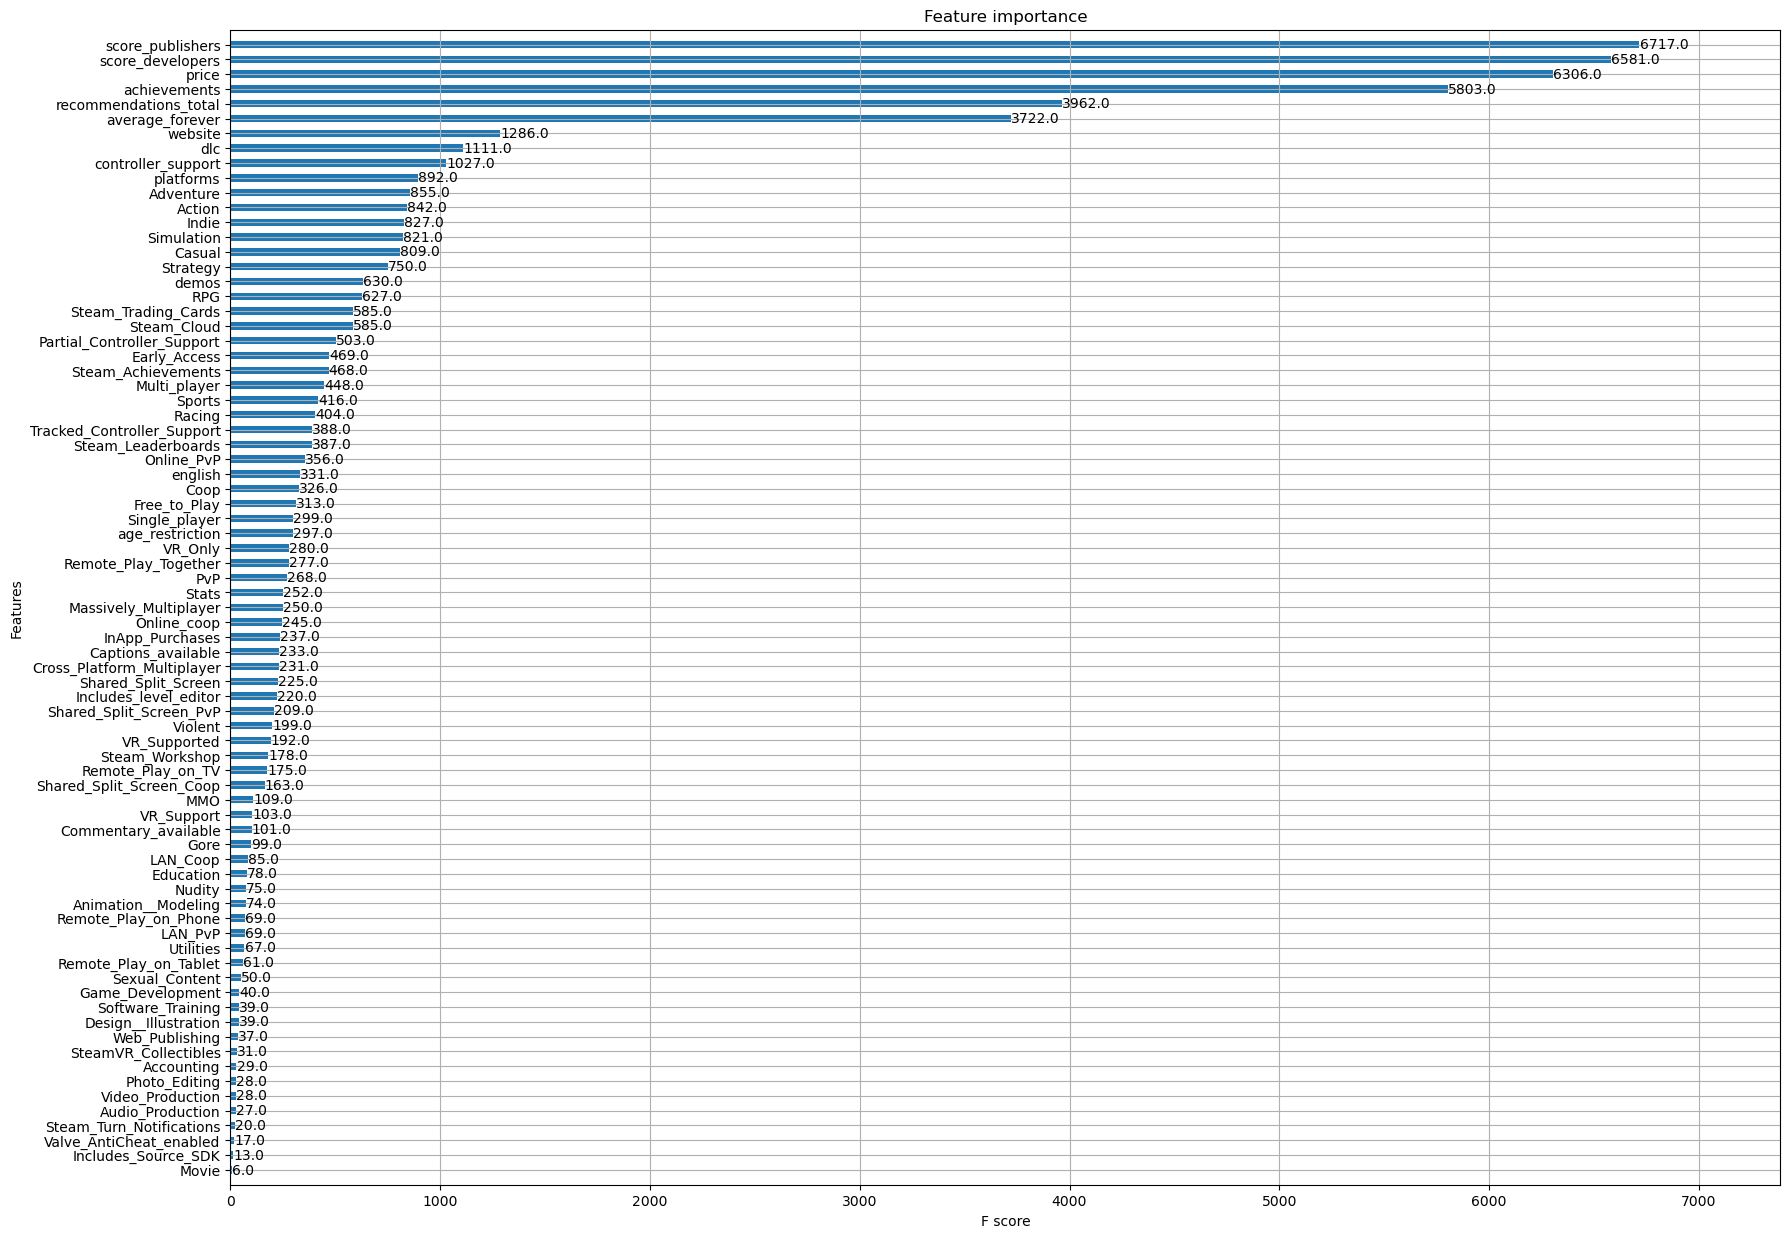

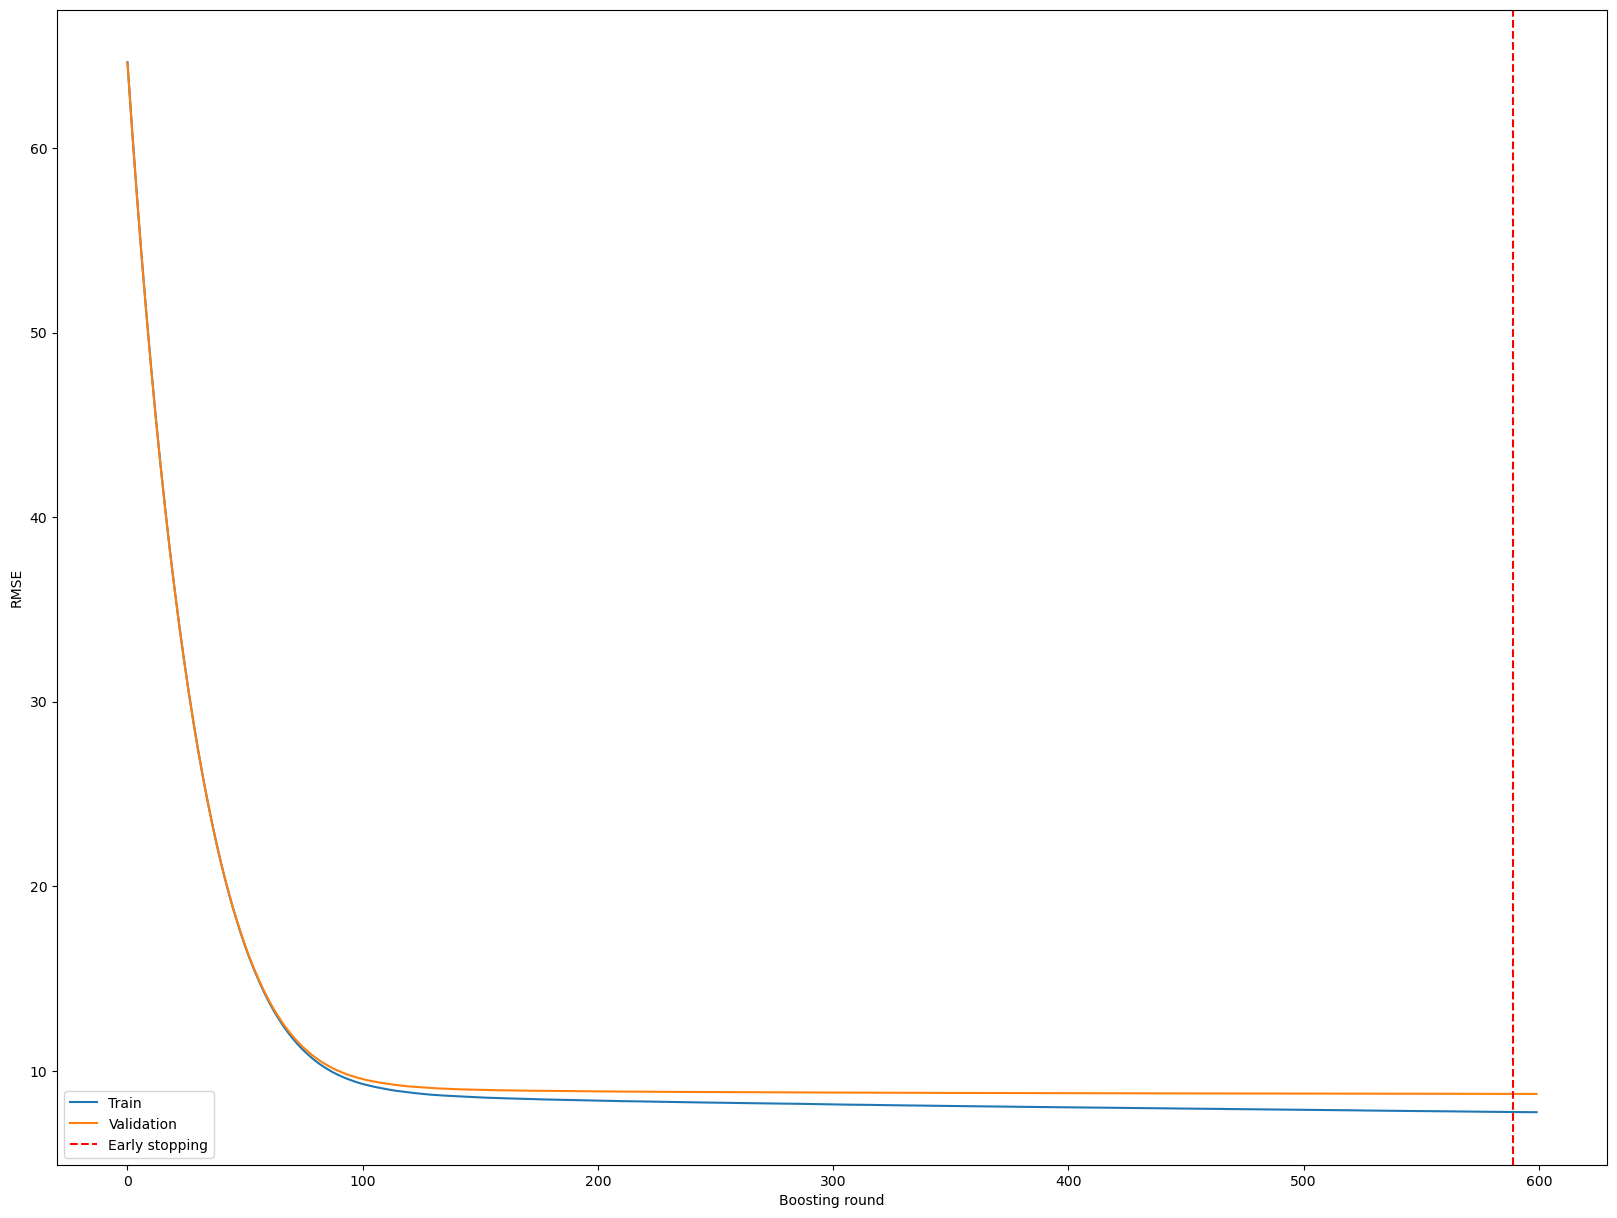

In [ ]:
#WYNIKI PIERWSZEGO TESTU MODELU

# Hyperparameter tuning 
poniższy kod po wykonaniu pokazuje najlepszą opcję do użycia w kolejnej iteracji, nie oznacza to że wynik po przejściu wszystkich iteracji będzie optymalny ze względu na wielowymiarowość i możliwą obecność wielu minimów
## Głębokość drzew max_depth

Max depth:  4
Score:  8.887836922246263
Train RMSE:  8.531685336078839
Valid RMSE:  8.8878664480491


Max depth:  6
Score:  8.748035294183595
Train RMSE:  7.807660601674186
Valid RMSE:  8.748741253842374


Max depth:  8
Score:  8.720464452377815
Train RMSE:  7.035451307110409
Valid RMSE:  8.72168612094057


Max depth:  10
Score:  8.718630584601764
Train RMSE:  6.798258151027853
Valid RMSE:  8.719359411077157


Max depth:  12
Score:  8.732872433950803
Train RMSE:  6.257080597576348
Valid RMSE:  8.739404325411153


Max depth:  14
Score:  8.731609205347462
Train RMSE:  5.87690963261768
Valid RMSE:  8.737338636581951


Best max_depth:  10
Best RMSE:  8.719359411077157


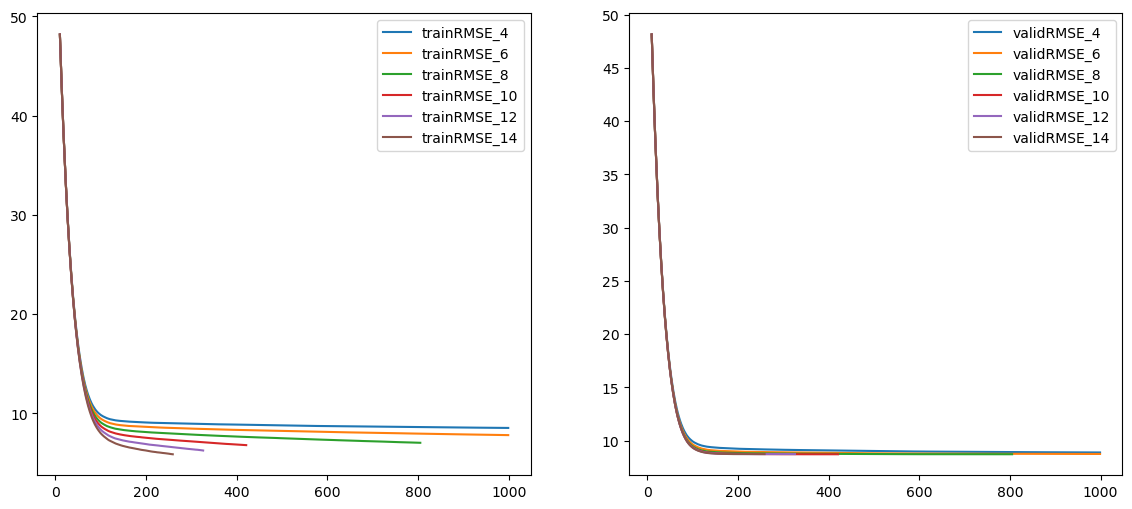

In [39]:
# Prepare the results object
resHists = dict()
rang = range(4,15,2)

best_rmse = float('inf')  # Initialize best_rmse to infinity
best_max_depth = None  # Initialize best_max_depth to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=x, early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print("Max depth: ", x)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_max_depth if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_max_depth = x

    print("\n")

print("Best max_depth: ", best_max_depth)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

## Udział wierszy i kolumn.

### subsample

Subsample:  0.3
Score:  8.741411752938387
Train RMSE:  6.913828895215545
Valid RMSE:  8.74899913866212


Subsample:  0.4
Score:  8.73630547778606
Train RMSE:  6.82517678733348
Valid RMSE:  8.73983002351262


Subsample:  0.5
Score:  8.736766925626926
Train RMSE:  6.92632924399858
Valid RMSE:  8.737980550744728


Subsample:  0.6
Score:  8.722510941914708
Train RMSE:  6.682388204265048
Valid RMSE:  8.726883369520225


Subsample:  0.7
Score:  8.718630584601764
Train RMSE:  6.798258151027853
Valid RMSE:  8.719359411077157


Subsample:  0.8
Score:  8.710844487794622
Train RMSE:  6.433779020594207
Valid RMSE:  8.712292171292823


Subsample:  0.9
Score:  8.717010283219539
Train RMSE:  6.336400072394321
Valid RMSE:  8.718176562281439


Best subsample:  0.8
Best RMSE:  8.712292171292823


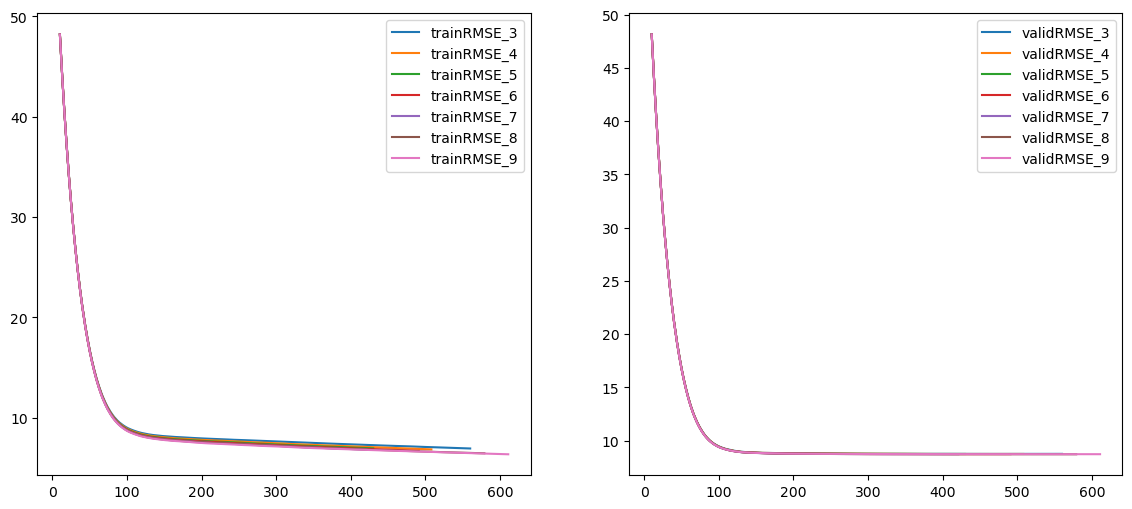

In [40]:
# Prepare the results object
resHists = dict()
rang = range(3,10)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_subsample = None  # Initialize best_subsample to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=10,  subsample=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    subsample_value = x/10
    print("Subsample: ", subsample_value)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_subsample if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_subsample = subsample_value

    print("\n")

print("Best subsample: ", best_subsample)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### colsample_bytree

Colsample_bytree:  0.3
Score:  8.721747756241838
Train RMSE:  6.713999724398472
Valid RMSE:  8.722341882454618


Colsample_bytree:  0.4
Score:  8.703371381429593
Train RMSE:  6.45674164965708
Valid RMSE:  8.706905209076103


Colsample_bytree:  0.5
Score:  8.692916959976834
Train RMSE:  6.4674025211720965
Valid RMSE:  8.695133635212867


Colsample_bytree:  0.6
Score:  8.693709932953157
Train RMSE:  6.3668251403376415
Valid RMSE:  8.69711226365713


Colsample_bytree:  0.7
Score:  8.710844487794622
Train RMSE:  6.433779020594207
Valid RMSE:  8.712292171292823


Colsample_bytree:  0.8
Score:  8.726865102260035
Train RMSE:  6.411370620770735
Valid RMSE:  8.73219552168125


Colsample_bytree:  0.9
Score:  8.743643133855285
Train RMSE:  6.493640622405326
Valid RMSE:  8.74436453691933


Best colsample_bytree:  0.5
Best RMSE:  8.695133635212867


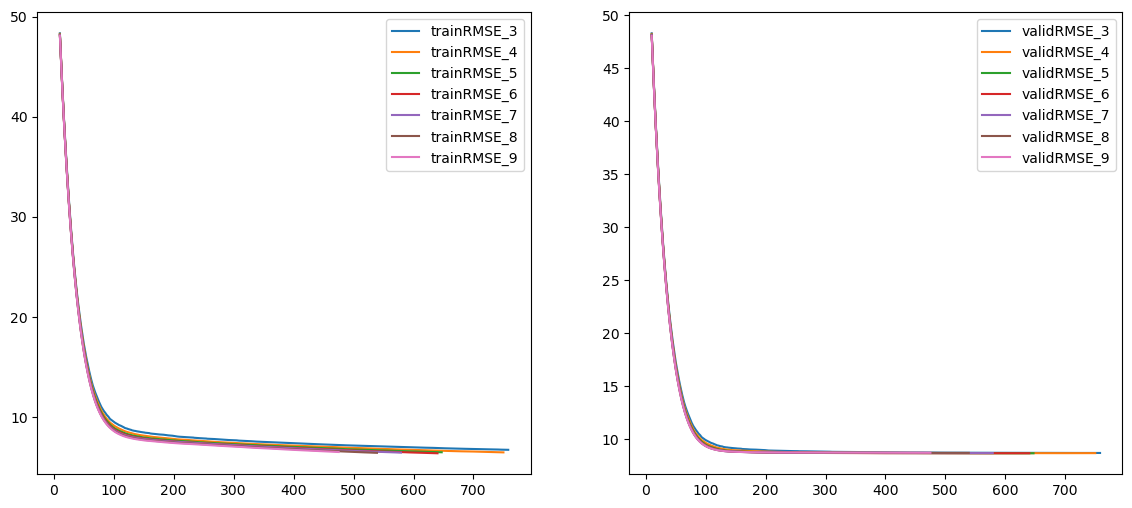

In [41]:
# Prepare the results object
resHists = dict()
rang = range(3,10)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_colsample_bytree = None  # Initialize best_colsample_bytree to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=10, subsample=0.8, colsample_bytree=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    colsample_bytree_value = x/10
    print("Colsample_bytree: ", colsample_bytree_value)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_colsample_bytree if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_colsample_bytree = colsample_bytree_value

    print("\n")

print("Best colsample_bytree: ", best_colsample_bytree)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### colsample_bylevel

Colsample_bylevel:  0.3
Score:  8.755091078266592
Train RMSE:  6.906456726633356
Valid RMSE:  8.755909749051131


Colsample_bylevel:  0.4
Score:  8.747959516131427
Train RMSE:  6.610835884743403
Valid RMSE:  8.748854603307025


Colsample_bylevel:  0.5
Score:  8.746926593166084
Train RMSE:  6.686776612960812
Valid RMSE:  8.748660337502159


Colsample_bylevel:  0.6
Score:  8.739870345710566
Train RMSE:  6.610069090915293
Valid RMSE:  8.7422581501769


Colsample_bylevel:  0.7
Score:  8.733616318835127
Train RMSE:  6.462760471347093
Valid RMSE:  8.73713435508717


Colsample_bylevel:  0.8
Score:  8.734574822204044
Train RMSE:  6.711689155323393
Valid RMSE:  8.736880158449516


Colsample_bylevel:  0.9
Score:  8.749989408330052
Train RMSE:  6.414049083051099
Valid RMSE:  8.754066334897416


Colsample_bylevel:  1.0
Score:  8.757740045511706
Train RMSE:  6.428452947925263
Valid RMSE:  8.761806409693117


Best colsample_bylevel:  0.8
Best RMSE:  8.736880158449516


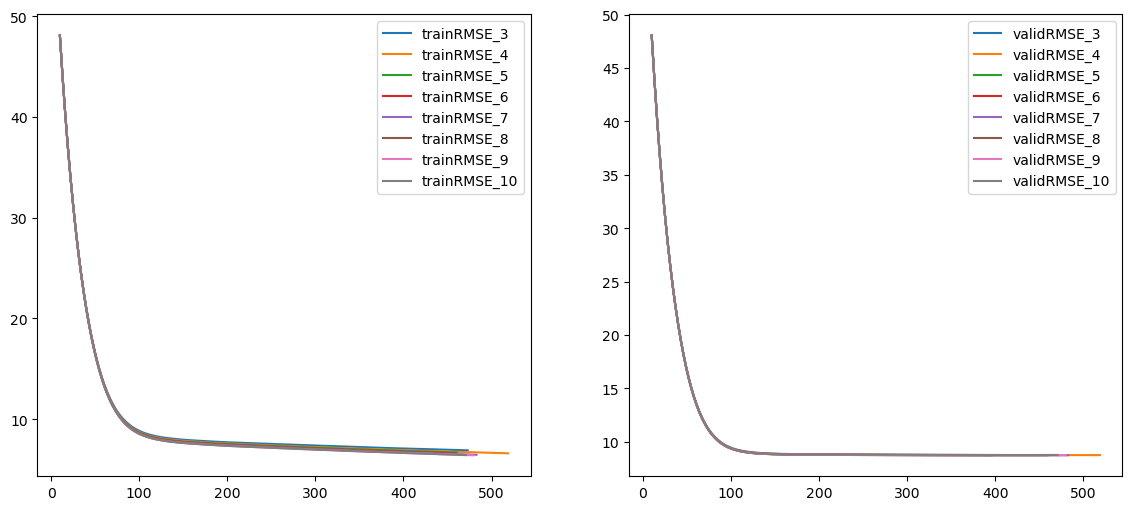

In [42]:
# Prepare the results object
resHists = dict()
rang = range(3,11)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_colsample_bylevel = None  # Initialize best_colsample_bylevel to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=10, subsample=0.8, colsample_bytree=1, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    colsample_bylevel_value = x/10
    print("Colsample_bylevel: ", colsample_bylevel_value)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_colsample_bylevel if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_colsample_bylevel = colsample_bylevel_value

    print("\n")

print("Best colsample_bylevel: ", best_colsample_bylevel)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### colsample_bylevel + colsample_bytree

Colsample_bylevel:  0.3
Score:  8.76492602356585
Train RMSE:  6.904596458596861
Valid RMSE:  8.765876086801391


Colsample_bylevel:  0.4
Score:  8.739408646780129
Train RMSE:  6.829803989752978
Valid RMSE:  8.741249724810654


Colsample_bylevel:  0.5
Score:  8.729080571336599
Train RMSE:  6.699795380976895
Valid RMSE:  8.732227470479337


Colsample_bylevel:  0.6
Score:  8.715732388881
Train RMSE:  6.58586874776803
Valid RMSE:  8.717147794358667


Colsample_bylevel:  0.7
Score:  8.714752975415577
Train RMSE:  6.498342629421563
Valid RMSE:  8.71696661319488


Colsample_bylevel:  0.8
Score:  8.709973746801703
Train RMSE:  6.561453224379517
Valid RMSE:  8.710894225005564


Colsample_bylevel:  0.9
Score:  8.706739291684958
Train RMSE:  6.593141322229161
Valid RMSE:  8.708583568011958


Colsample_bylevel:  1.0
Score:  8.692916959976834
Train RMSE:  6.4674025211720965
Valid RMSE:  8.695133635212867


Best colsample_bylevel:  1.0
Best RMSE:  8.695133635212867


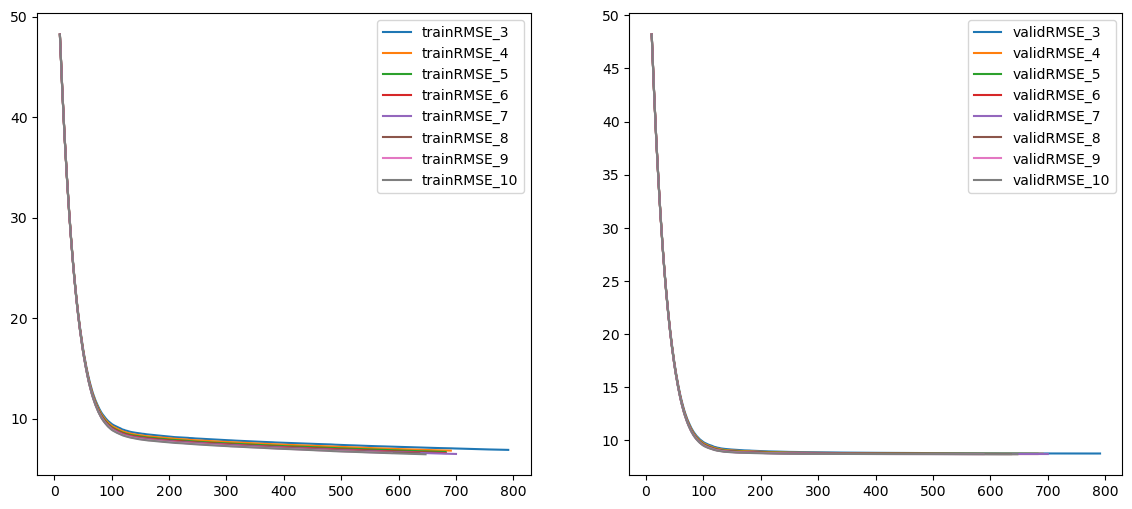

In [43]:
# Prepare the results object
resHists = dict()
rang = range(3,11)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_colsample_bylevel = None  # Initialize best_colsample_bylevel to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    colsample_bylevel_value = x/10
    print("Colsample_bylevel: ", colsample_bylevel_value)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_colsample_bylevel if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_colsample_bylevel = colsample_bylevel_value

    print("\n")

print("Best colsample_bylevel: ", best_colsample_bylevel)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

Z trzech, bytree, bylevel i bytree + bylevel, najlepsze wyniki osiąga bytree, także zastojemy miarę w nim znalezioną a bylevel zostanie na poziomie 1

## Regularyzacja L2

Reg_lambda:  0
Score:  8.732483557892818
Train RMSE:  6.528418719480372
Valid RMSE:  8.733894289637169


Reg_lambda:  1
Score:  8.692916959976834
Train RMSE:  6.4674025211720965
Valid RMSE:  8.695133635212867


Reg_lambda:  4
Score:  8.69189639626831
Train RMSE:  6.762712527812693
Valid RMSE:  8.693113521676034


Reg_lambda:  9
Score:  8.68183121033941
Train RMSE:  6.943248090407666
Valid RMSE:  8.684584407306433


Reg_lambda:  16
Score:  8.685223602631686
Train RMSE:  7.194936633055751
Valid RMSE:  8.68675928226018


Reg_lambda:  25
Score:  8.691860189672047
Train RMSE:  7.185216458245305
Valid RMSE:  8.693088263407816


Reg_lambda:  36
Score:  8.695430192068578
Train RMSE:  7.166341550567204
Valid RMSE:  8.69613825033874


Reg_lambda:  49
Score:  8.69984954247308
Train RMSE:  7.324752332959346
Valid RMSE:  8.700796377974866


Best reg_lambda:  9
Best RMSE:  8.684584407306433


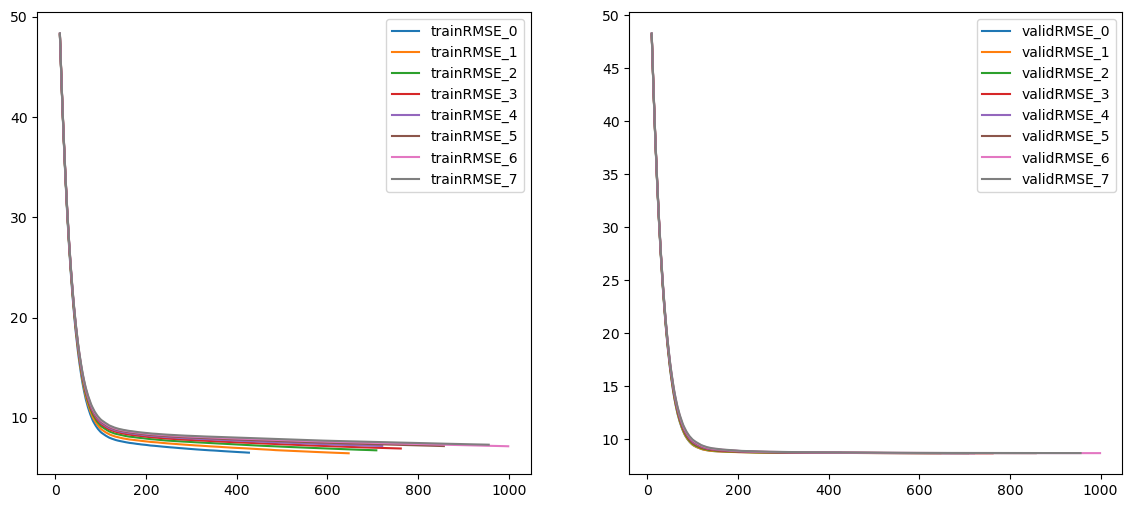

In [44]:
# Prepare the results object
resHists = dict()
rang = range(0,8)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_reg_lambda = None  # Initialize best_reg_lambda to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=x**2,
                                                          max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    reg_lambda_value = x**2
    print("Reg_lambda: ", reg_lambda_value)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_reg_lambda if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_reg_lambda = reg_lambda_value

    print("\n")

print("Best reg_lambda: ", best_reg_lambda)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

## Gamma

Gamma:  0
Score:  8.68183121033941
Train RMSE:  6.943248090407666
Valid RMSE:  8.684584407306433


Gamma:  0.01
Score:  8.681976076216047
Train RMSE:  6.811319309672126
Valid RMSE:  8.685074533204002


Gamma:  0.1
Score:  8.680350796899003
Train RMSE:  6.952293557945635
Valid RMSE:  8.682442045529118


Gamma:  0.5
Score:  8.676702514053996
Train RMSE:  6.815501851662355
Valid RMSE:  8.679326251927947


Gamma:  1
Score:  8.679073801126153
Train RMSE:  7.021207914557285
Valid RMSE:  8.680480369508699


Gamma:  2
Score:  8.692027053393515
Train RMSE:  6.962170840565153
Valid RMSE:  8.692941379912304


Gamma:  5
Score:  8.686777811468296
Train RMSE:  7.002822853786684
Valid RMSE:  8.687543766266243


Best gamma:  0.5
Best RMSE:  8.679326251927947


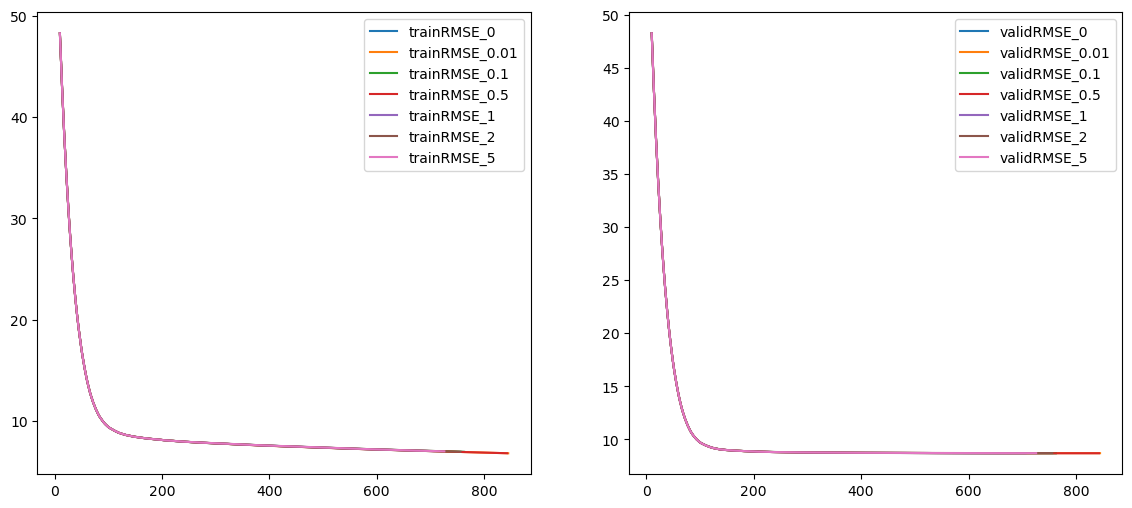

In [45]:
# Prepare the results object
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_gamma = None  # Initialize best_gamma to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=9,
                                                          max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1,
                                                          gamma=x,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print("Gamma: ", x)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_gamma if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_gamma = x

    print("\n")

print("Best gamma: ", best_gamma)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

przyjrzymy się jeszcze mniejszym wartościom lambda przy użyciu dodatkowej regularyzacji

Gamma:  0
Score:  8.69189639626831
Train RMSE:  6.762712527812693
Valid RMSE:  8.693113521676034


Gamma:  0.01
Score:  8.688929239349157
Train RMSE:  6.726740059213033
Valid RMSE:  8.692114760858624


Gamma:  0.1
Score:  8.684325723426774
Train RMSE:  6.701255158660652
Valid RMSE:  8.687518873256726


Gamma:  0.5
Score:  8.696003183045264
Train RMSE:  6.804614992552583
Valid RMSE:  8.696787839722951


Gamma:  1
Score:  8.694140766798403
Train RMSE:  6.728492932285952
Valid RMSE:  8.695921612614743


Gamma:  2
Score:  8.683688170536394
Train RMSE:  6.805367473419497
Valid RMSE:  8.68497168314818


Gamma:  5
Score:  8.689427488561666
Train RMSE:  6.738996546721
Valid RMSE:  8.690850227752792


Best gamma:  2
Best RMSE:  8.68497168314818


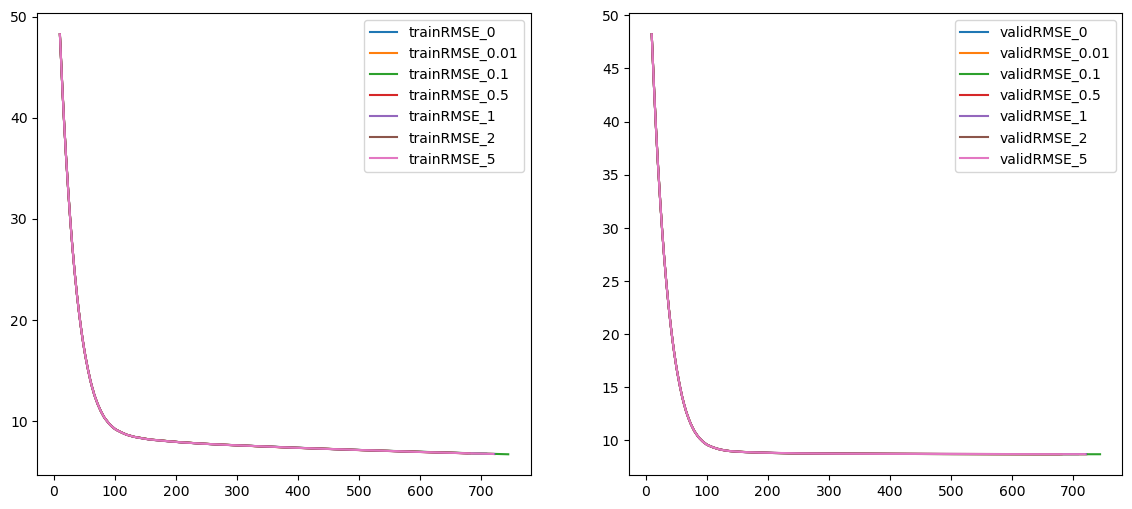

In [46]:
# Prepare the results object
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_gamma = None  # Initialize best_gamma to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=4,
                                                          max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1,
                                                          gamma=x,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print("Gamma: ", x)
    print("Score: ", score)
    train_rmse = train_history['trainRMSE'].iloc[-1]
    valid_rmse = train_history['validRMSE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_gamma if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_gamma = x

    print("\n")

print("Best gamma: ", best_gamma)
print("Best RMSE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

wyniki nie polepszyły się, w związku z czym pozostajemy przy lambdzie = 9 

## Walidacja krzyżowa xgboost

### Pierwszy trening

In [58]:
df = XGBoost_data

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare a simple wrapper
def CVTestXGB(nFolds = 5, randomState=2020, features=features, debug=False, *args, **kwargs):
    
    # Prepare cross-validation
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Save results from the training and test set
    testResults = []
    trainResults = []
    
    # Also keep predictions for individual folds
    predictions = []
    
    # Along with information about their index in the original data set
    indices = []
    
    # Prepare a list of histories
    hists = []
    fold = 1
    for train, test in kf.split(df.index.values):
        # Prepare the estimator
        score, trainPred, testPred, train_history, impFig, imp = run_xgb(df.iloc[train], df.iloc[test],
                                                                         features, target, debug=debug, *args, **kwargs)

        # Keep information about predictions for this fold
        predictions.append(testPred.tolist().copy())
        
        # Along with indices in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Reporting on each fold along with training results can optionally be displayed during
        trainScore = np.sqrt(mean_squared_error(df[target].iloc[train], trainPred))
        testScore = np.sqrt(mean_squared_error(df[target].iloc[test], testPred))
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        hists.append(train_history.add_suffix('_'+str(fold)))
        fold+=1
        
        if debug:
            print("Train RMSE:", trainScore,
                  "Valid RMSE:", testScore)
        
    return trainResults, testResults, predictions, indices, pd.concat(hists, axis=1)

In [60]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
    max_depth=10, reg_lambda=9, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1, gamma=0.5, debug=False)
np.mean(trainResults), np.mean(testResults)

(7.051631138265795, 8.666762986340956)

### Znaczenie walidacji krzyżowej

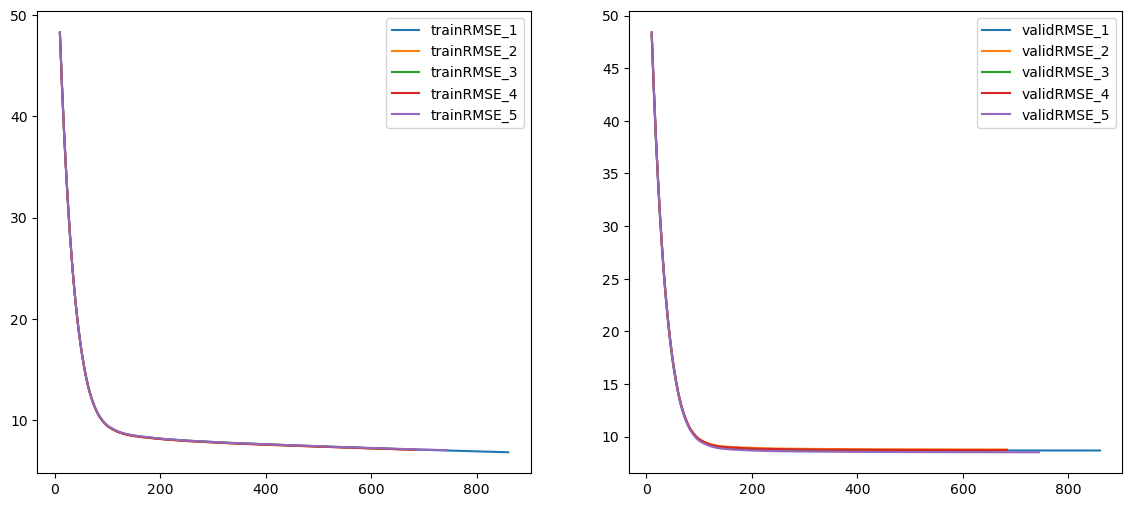

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in range(1,6):
    hists[['trainRMSE'+'_'+str(x)]].iloc[10:].plot(ax=ax[0])
    hists[['validRMSE'+'_'+str(x)]].iloc[10:].plot(ax=ax[1])
plt.show()

### Ograniczenia walidacji

In [62]:
resList = []
for k in range(10):
    trainResults, testResults, predictions, indices, hists = CVTestXGB(randomState=randint(1,10000),
        max_depth=10, reg_lambda=9, subsample=0.8, colsample_bytree=0.5, gamma=0.5, debug=False)
    resList.append(np.mean(testResults))
    print("Average Test RMSE: ", np.mean(testResults), "Test RMSEs: ", testResults)

print("All Average Test RMSEs: ", [round(x, 3) for x in resList])
print("Overall Average Test RMSE: ", np.mean(resList))

Average Test RMSE:  8.677591138316368 Test RMSEs:  [8.763180370380352, 8.607368854698594, 8.80626534757813, 8.585548019969892, 8.62559309895487]
Average Test RMSE:  8.678193508133502 Test RMSEs:  [8.727992222304444, 8.589141319818902, 8.784032169439929, 8.743797963740787, 8.546003865363453]
Average Test RMSE:  8.678193508133502 Test RMSEs:  [8.727992222304444, 8.589141319818902, 8.784032169439929, 8.743797963740787, 8.546003865363453]
Average Test RMSE:  8.686827388198626 Test RMSEs:  [8.612498518150717, 8.688918384187428, 8.721170941815265, 8.731890625593566, 8.679658471246158]
Average Test RMSE:  8.688034120601511 Test RMSEs:  [8.467170659798258, 8.744970518234169, 8.842219484996233, 8.746714676506075, 8.639095263472827]
Average Test RMSE:  8.691244926273512 Test RMSEs:  [8.703557656263174, 8.779311230487755, 8.602358656042638, 8.686212473794393, 8.684784614779606]
Average Test RMSE:  8.687805106610629 Test RMSEs:  [8.581694812970056, 8.658170201119892, 8.699139664305308, 8.754976417

### Dobór hiperparametrów z walidacją krzyżową

4 8.860415390201416
5 8.773111791854479
6 8.722952489957317
7 8.703650012339747
8 8.694972408849441
9 8.692804270294841
10 8.69495011435013
11 8.692354586586001


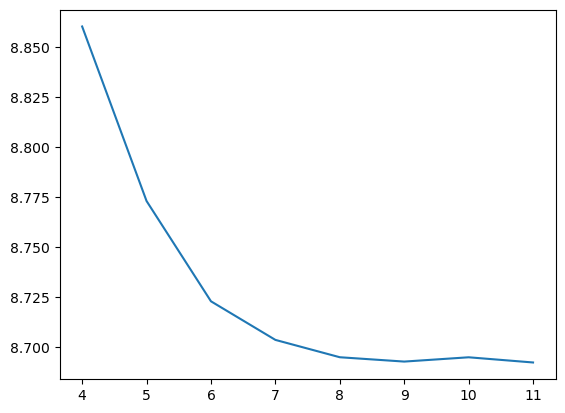

In [63]:
rang = range(4,12)
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=x)
    print(x, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

Po 8 mamy w miarę zbliżoną wartość RMSE dlatego wybierzemy 10 jak wyszło w poprzednich próbach

2 8.766621187979585
3 8.73885796170776
4 8.723682599524588
5 8.708468481194771
6 8.69675890712281
7 8.69495011435013
8 8.682748267885227
9 8.688501123383391


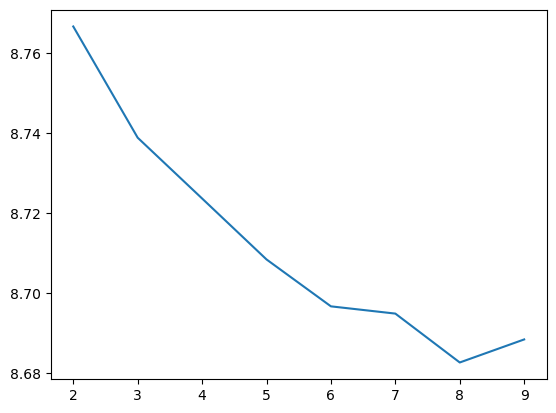

In [66]:
rang = range(2,10)
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = x/10)
    print(x, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

widzimy, że 0.8 jest wartością dla które rmse jest najmniejsze, taka sama wartość jak w przypadku wcześniejszego hypertuningu 

2 8.7493900605371
3 8.701399612913836
4 8.67761614239603
5 8.67846883304673
6 8.68719997512537
7 8.682748267885227
8 8.693218115267257
9 8.701258421190456


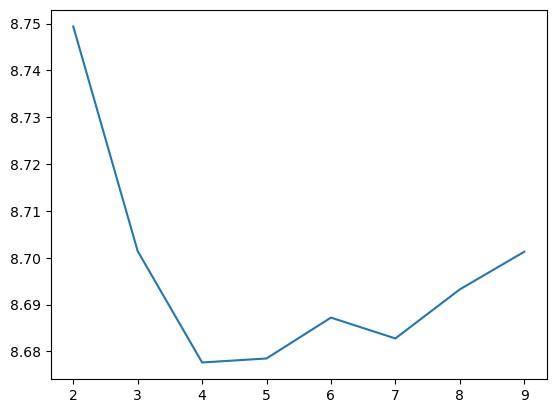

In [69]:
rang = range(2,10)
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = 0.8, colsample_bytree = x/10)
    print(x, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

tu z kolei 4 oraz 5 są najlepszymi opcjami, więc zastojuemy 5 aby dopasować się do wyników z poprzednich prób, 4 i 5 różnią się minimalnie co nie powinno generować problemu

0 8.701322998809223
1 8.67846883304673
4 8.665508324639253
9 8.663626712234237
16 8.66624872338013
25 8.666111461996085
36 8.67256905949385
49 8.677198745984018


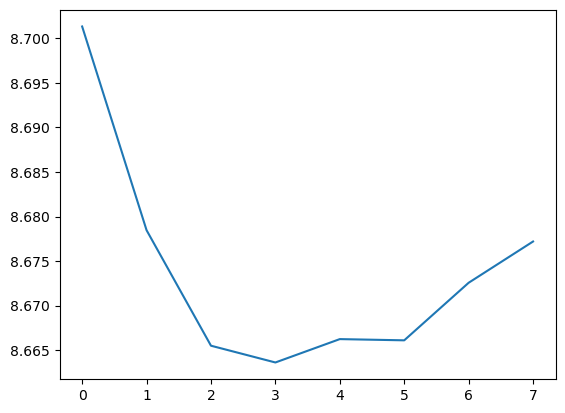

In [71]:
rang = range(0,8)
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = 0.8, colsample_bytree = 0.5, reg_lambda=x**2)
    print(x**2, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

2(4) i 3(9) są nalepszymi kandydatami na lambe, więc weźmiemy 9 aby dopasować się do poprzeniego hypertuningu, możliwe że sprawdzimy 4 przy gammie

0.01 8.665992509150787
0.1 8.665452235325718
0.5 8.666762986340956
1 8.666708185059779
2 8.667594741865278
4 8.66758960015745
6 8.667219276271362
8 8.668868255363217
10 8.664819566230886
15 8.662472464969
20 8.667583054126444
25 8.66749945785481
30 8.665338911265621


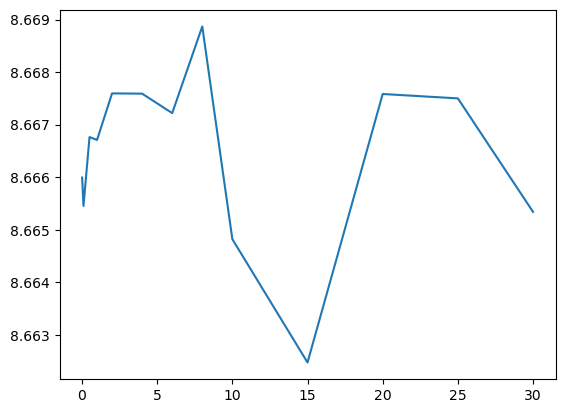

In [73]:
rang = [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10, 15,20,25,30]
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = 0.8, colsample_bytree = 0.5, reg_lambda=9, gamma=x)
    print(x, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

gamma najlepiej wychodzi przy 15, jednakże nie są to montrualne zmiany (na poziomie 6/1000)

sprawdzamy jeszcze co się stanie przy mniejszej lambdzie

0.01 8.667588077371768
0.1 8.665906694954554
0.5 8.662407485782866
1 8.663884774855493
2 8.662304345815496
4 8.667479950624744
6 8.663163557691902
8 8.664456049510203
10 8.661259058917132
15 8.665022816036704
20 8.662177504481601
25 8.665340761414878
30 8.660777850752742


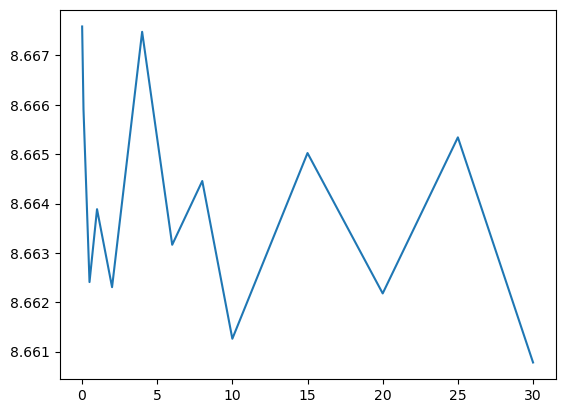

In [75]:
rang = [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10, 15,20,25,30]
results = []
for x in rang:
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = 0.8, colsample_bytree = 0.5, reg_lambda=4, gamma=x)
    print(x, np.mean(testResults))
    results.append(np.mean(testResults))
    
plt.plot(list(rang), results)
plt.show()

jak widzimy, wygenerowało nam to sporo problemów a mianowicie musielibyśmy prawdopodobnie sprawdzić wartości po 30 albo zastosować gamme = 10, także zostajemy przy poprzednich wynikach

In [ ]:
### Porównanie wyników

In [ ]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=10, subsample = 0.8, colsample_bytree = 0.5, reg_lambda=9, gamma=15)
print(np.mean(testResults))

modelXGB = {
    "name":"XGB",
    "description":"Model XGB, ze zmiennymi kategorycznymi z LE",
    "specification":'max_depth=10, subsample = 0.8, colsample_bytree = 0.5, lambdaX=9, gamma=15',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

8.662472464969


8.666762986340956 to z koleji wcześniejszy wynik bez cross walidacji

wyniki różnią się minimalnie

In [96]:
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets
X_train, X_valid = train_test_split(XGBoost_data, test_size=0.2, random_state=2017)

# Run the XGBoost model
score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, max_depth=10, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=1,reg_lambda=9,gamma=5,early_stopping_rounds=50, debug=False)
# Get the best iteration
best_iteration = train_history['validRMSE'].idxmin()

# Print the best iteration and corresponding RMSE
print("Best iteration: ", best_iteration)
print("Best RMSE for train: ", train_history['trainRMSE'][best_iteration])
print("Best rmse for validation: ", train_history['validRMSE'][best_iteration])

# Get the names of the features that were used in the model
used_features = [feature[0] for feature in imp]

# Get the names of the features that were removed
removed_features = list(set(features) - set(used_features))

# Print the names of the removed features
print("Removed features: ", removed_features)

Best iteration:  676
Best RMSE for train:  7.0723443057283095
Best rmse for validation:  8.686777811468296
Removed features:  ['require_HL2']


# MAE

In [78]:
#Wrapper do xgboosta dla MAE

In [101]:
xgb.set_config(verbosity=0)
# Increase the size of the importance plot
def run_xgb(train, validate, features, target, # required arguments
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7, # hyperparameters
            colsample_bylevel=1, reg_lambda=1, alpha=0, gamma=0, min_child_weight=0, rate_drop = 0, skip_drop=0, # hyperparameters
            num_boost_round = 1000, early_stopping_rounds = 30, # hyperparameters
            debug=True, eval_metric= ["mae"], objective = "reg:squarederror", # configuration
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise", verbosity = 0, silent=True,): # configuration


    '''
    Uniwersalny wrapper dla XGB dla gbtree i dart
    Więcej opcji https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
    
    Parametry
    ----------
    train, validate, features, target : wymagane zmienne bez domyślnych wartości
    train, validate : pd.DataFrames z kolumnami opisanymi w features i target
    features : lista zmiennych do wykorzystania w trenowaniu
    target : nazwa zmiennej objasnianej
    
    --- Zmienne wspólne dla gbtree i dart
        --- Zmienne właściwe dla Ensamble/Boosting
        eta : "learning rate"
        max_depth=7 : maksymalna głębokość drzew [0,∞]
        subsample : udział (0,1] obserwacji do treningu jednej iteracji
        colsample_bytree : udział (0,1] kolumn do treningu jednej iteracji
        colsample_bylevel : udział  (0,1] kolumn na poziom do treningu jednej iteracji
        --- Zmienne regularyzacyjne
        reg_lambda=0 : regularyzacja L2 [0,∞]
        alpha=0 : regularyzacja L1 [0,∞]
        gamma=1 : minimalna redukcja funkcji straty
        min_child_weight=0 : minimalna suma wg poddrzewa

    --- Zmienne dla algorytmu dart

    
    --- Zmienne dla XGB, opis/agorytm/liczba drzew etc.
    num_boost_round : maksymalna liczba iteracji
    early_stopping_rounds : margines iteracji dla early stopping
    debug : Czy włączyć pełne opisy.
    eval_metric : Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    objective : reg:linear, reg:logistic, binary:logistic, multi:softmax lub inne Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    seed : random seed
    booster : ‘auto’, ‘exact’, ‘approx’, ‘hist’, ‘gpu_exact’, ‘gpu_hist’- silnik
    tree_method : zobacz http://xgboost.readthedocs.io/en/latest/parameter.html
    grow_policy : depthwise, lossguide
    '''
   
    start_time = time.time()
    paramList= ['eta', 'max_depth',
                'subsample', 'colsample_bytree', 'colsample_bylevel',
                'reg_lambda', 'alpha', 'gamma', 'min_child_weight', 
                'rate_drop', 'skip_drop',         'eval_metric', 'objective',
                'seed', 'booster', 'tree_method', 'grow_policy']

    # Stworzenie słownika do przekazania do XGB
    params = dict()
    for param in paramList:
        params[param]=eval(param)
    if(debug):
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    # Automatyczne przekazanie liczby klas dla wielu poziomów klasyfikacji
    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    verbosity=0

    # Przekształcenie zbiorów do struktury DMatrix
    # Struktura danych DMatrix pozwala na efektywne tworzenie drzew
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values)
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values)

    # Stworzenie listy zbiorów do ealuacji
    evals = [(dtrain, 'train'), (dvalid, 'valid')]

    # Stworzenie zmiennej słownikowej do przekazania
    train_history = dict()

    # Uruchomienie algorytmu trenującego
    gbm = xgb.train(params, dtrain, 
                num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds,
                evals=evals, evals_result=train_history, verbose_eval=debug)

    # Obliczenai statystyk i dodatkowych wartości
    score = gbm.best_score

    # Przekształcenie historii trenowania do Pandas Data Frame
    trainHistory = dict()
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    train_history = pd.DataFrame(trainHistory)

    # Zapis przewidywanych wartości dla zbioru walidacyjnego dla najlepszej (z punktu widzenia walidacji) iteracji
    trainPred = gbm.predict(dtrain, iteration_range=(0, gbm.best_iteration))
    testPred = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration))

    # Przygotowanie posortowanej listy dla wazności zmiennych, zamaist słownika
    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)
    impFig = None # Initialize impFig to None
    # Calculate the number of features that stayed and the total number of features
    total_features = len(features)
    features_that_stayed = len(imp)

    if(debug):
        print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
        print('Number of features that stayed: {}'.format(features_that_stayed))
        print('Total number of features: {}'.format(total_features))
        # Use the built-in function to visualize feature importance
        impFig, ax = plt.subplots(figsize=(20,15)) # Increase the size of the figure
        xgb.plot_importance(gbm, ax=ax, linewidth=12, height=0.5)
    
        # Save the figure to a file
        plt.savefig('feature_importance.png')

        # Plot training and validation errors
        fig, ax = plt.subplots(figsize=(20,15))
        ax.plot(train_history['train' + eval_metric[0].upper()], label='Train')
        ax.plot(train_history['valid' + eval_metric[0].upper()], label='Validation')
        ax.legend()
        ax.set_xlabel('Boosting round')
        ax.set_ylabel('mae')
        ax.axvline(x=gbm.best_iteration, color='r', linestyle='--', label='Early stopping')
        ax.legend()
    return score, trainPred, testPred, train_history, impFig, imp

eta 0.03, max_depth 7, subsample 0.7, colsample_bytree 0.7, colsample_bylevel 1, reg_lambda 1, alpha 0, gamma 0, min_child_weight 0, rate_drop 0, skip_drop 0, eval_metric ['mae'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 42336
Length valid: 10584
[0]	train-mae:63.10271	valid-mae:63.06179
[1]	train-mae:61.21617	valid-mae:61.17327
[2]	train-mae:59.38359	valid-mae:59.33906
[3]	train-mae:57.60710	valid-mae:57.56096
[4]	train-mae:55.88470	valid-mae:55.83903
[5]	train-mae:54.21431	valid-mae:54.16932
[6]	train-mae:52.59297	valid-mae:52.54761
[7]	train-mae:51.01915	valid-mae:50.97488
[8]	train-mae:49.49403	valid-mae:49.45019
[9]	train-mae:48.01329	valid-mae:47.97025
[10]	train-mae:46.57744	valid-mae:46.53154
[11]	train-mae:45.18603	valid-mae:45.13921
[12]	train-mae:43.83604	valid-mae:43.78755
[13]	train-mae:42.52720	valid-mae:42.47759
[14]	train-mae:41.25800	valid-mae:41.20694
[15]	train-mae:40.02598	valid-mae:39.97333
[16]

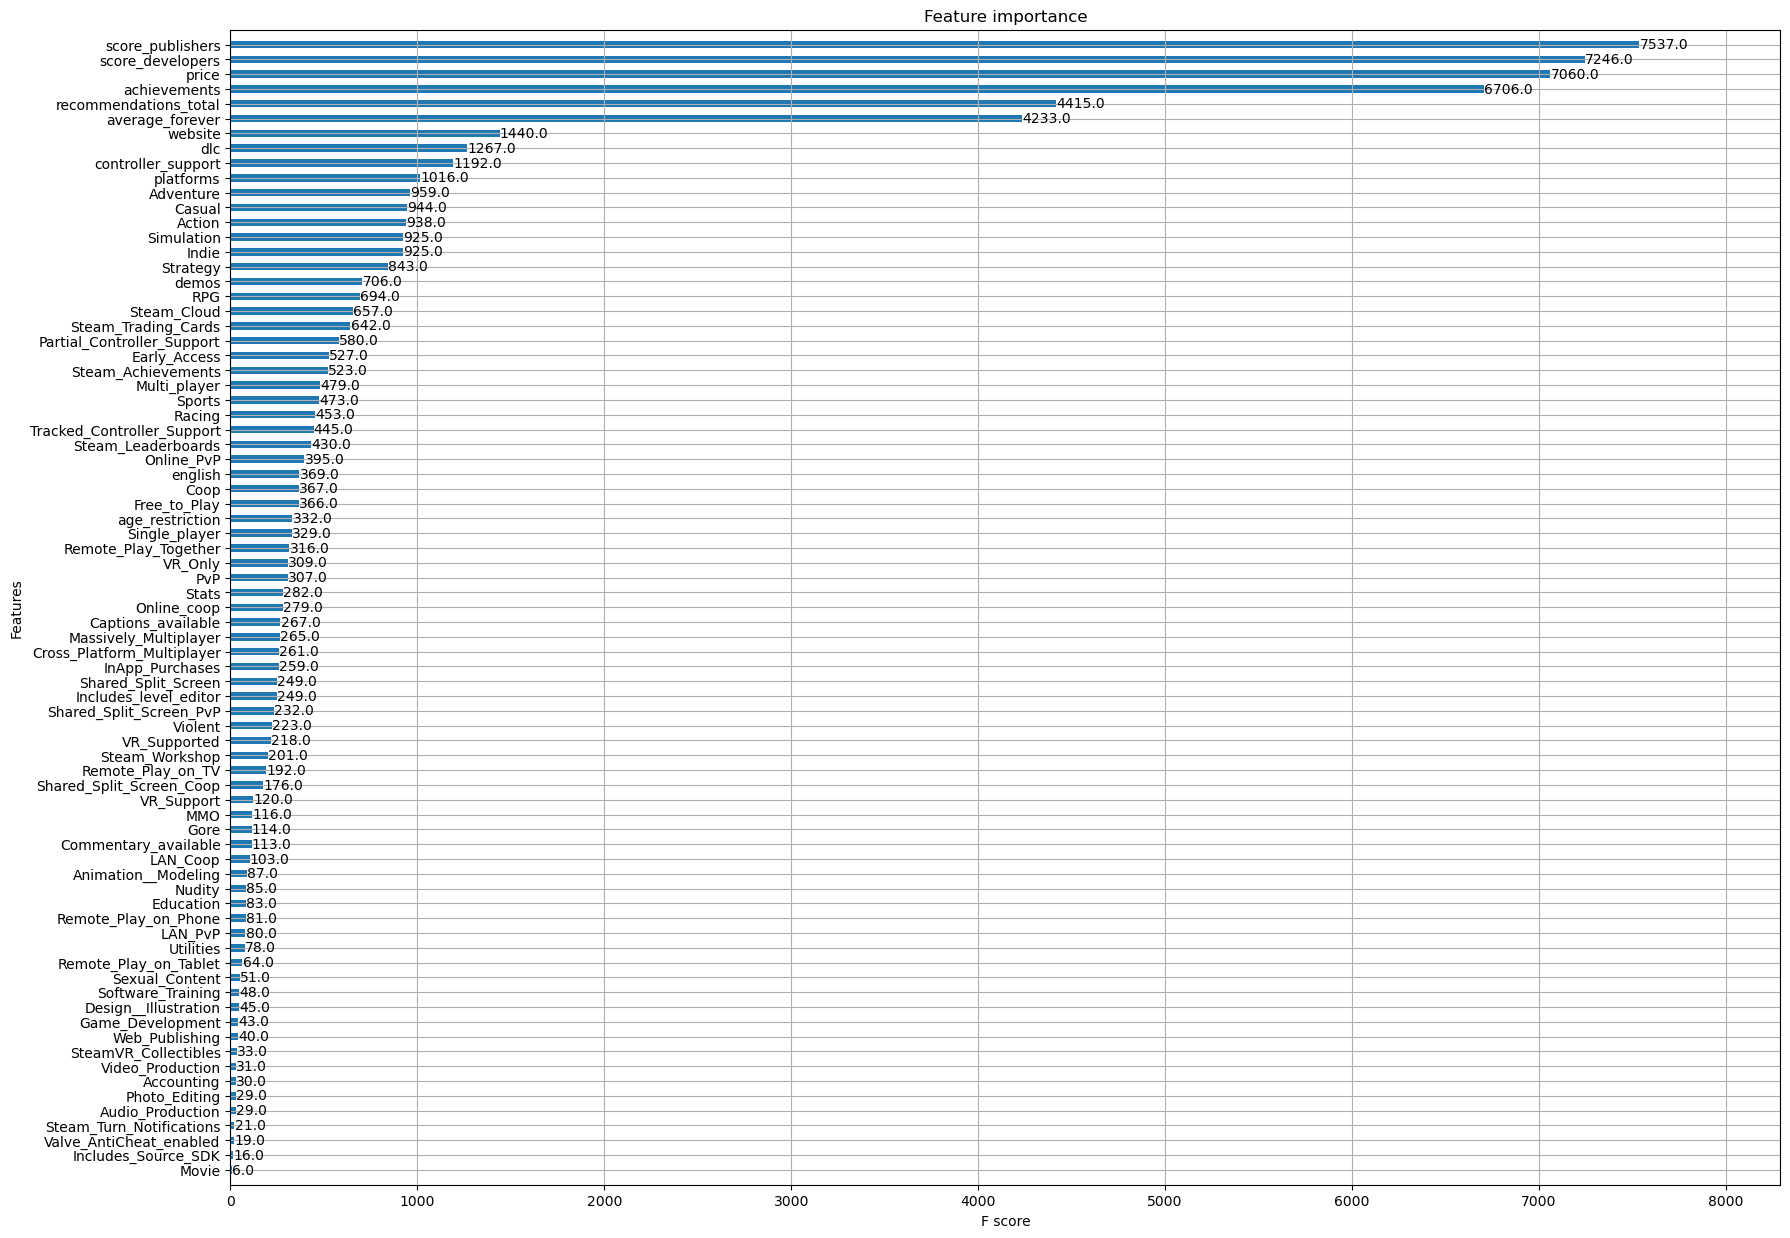

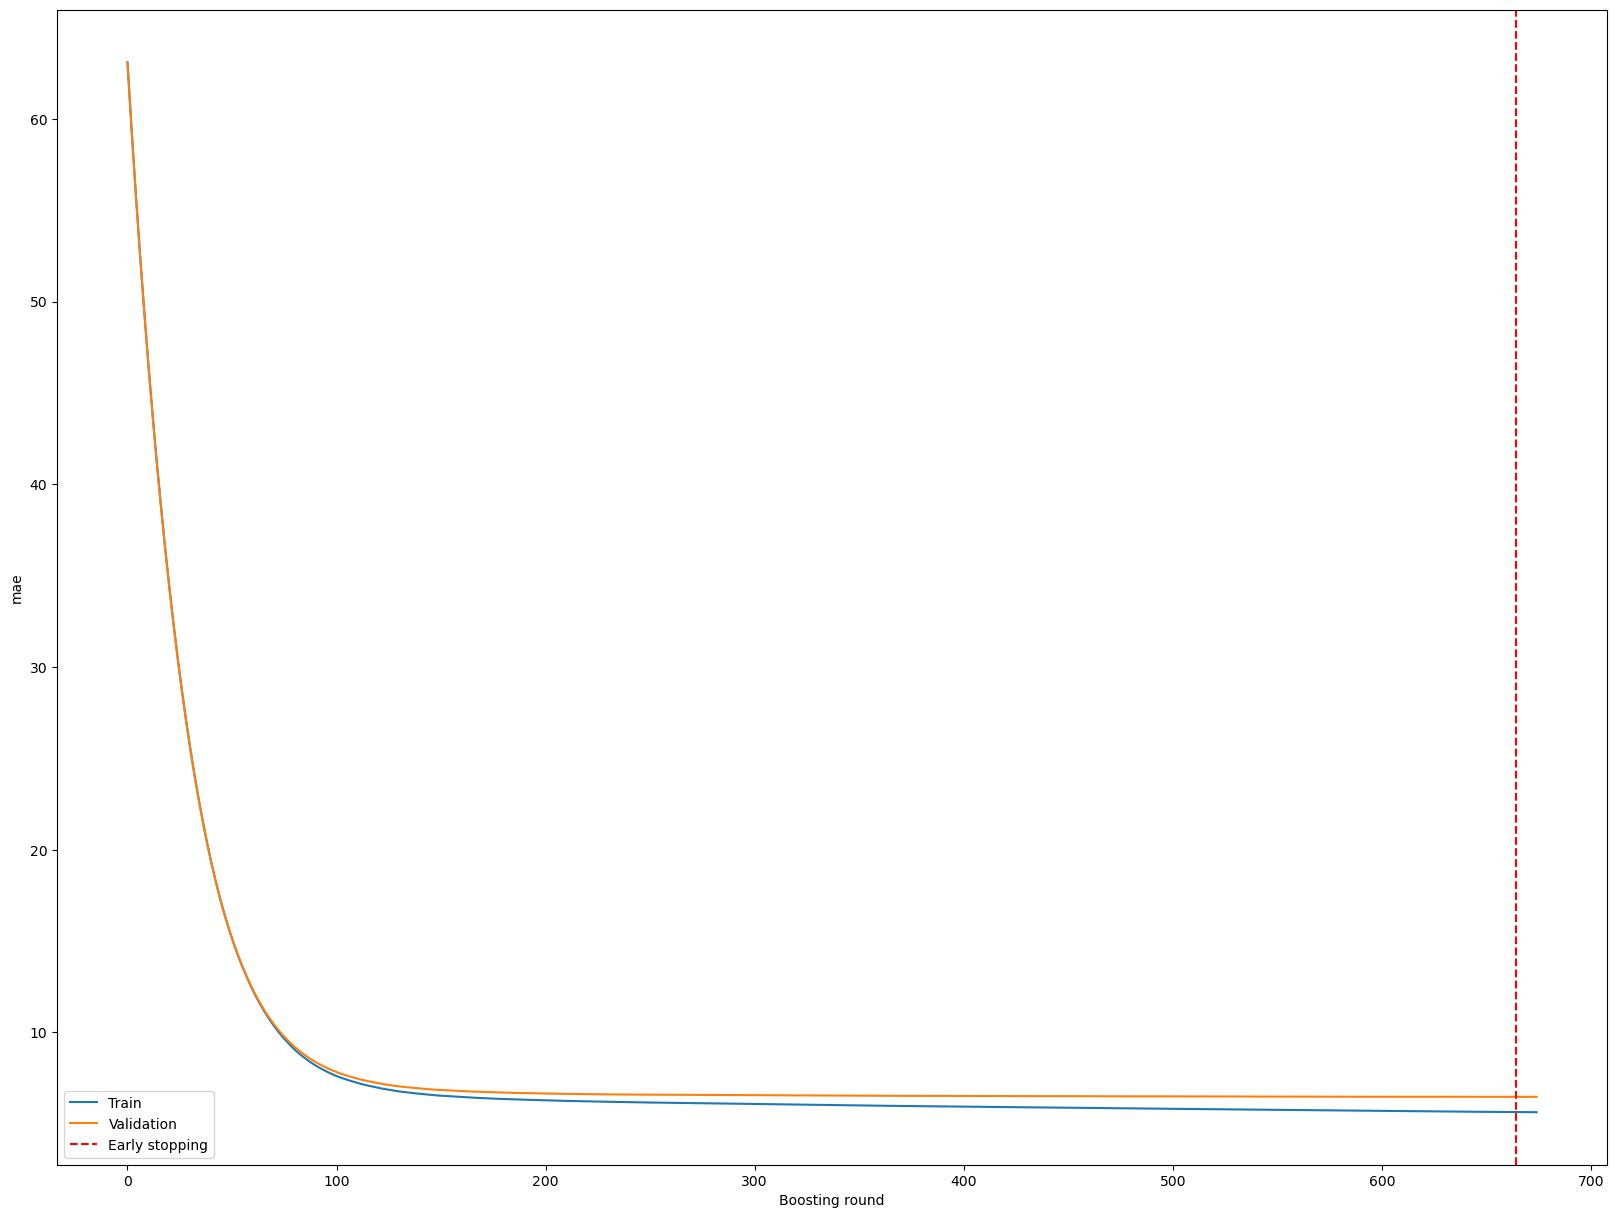

In [102]:
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets
X_train, X_valid = train_test_split(XGBoost_data, test_size=0.2, random_state=2017)

# Run the XGBoost model
score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, early_stopping_rounds=10)

# Get the best iteration
best_iteration = train_history['validMAE'].idxmin()

# Print the best iteration and corresponding RMSE
print("Best iteration: ", best_iteration)
print("Best MAE for train: ", train_history['trainMAE'][best_iteration])
print("Best MAE for validation: ", train_history['validMAE'][best_iteration])

# Get the names of the features that were used in the model
used_features = [feature[0] for feature in imp]

# Get the names of the features that were removed
removed_features = list(set(features) - set(used_features))

# Print the names of the removed features
print("Removed features: ", removed_features)

Max depth:  4
Score:  6.634869478547204
Train MAE:  6.357099929183879
Valid MAE:  6.634869478547204


Max depth:  6
Score:  6.504649086423832
Train MAE:  5.901649276866033
Valid MAE:  6.504949716934181


Max depth:  8
Score:  6.445094762205267
Train MAE:  5.323043653551413
Valid MAE:  6.4457857810631


Max depth:  10
Score:  6.433986980808745
Train MAE:  4.9628619473492295
Valid MAE:  6.434834903239843


Max depth:  12
Score:  6.420570623487212
Train MAE:  4.434543257510221
Valid MAE:  6.421077170519782


Max depth:  14
Score:  6.418865641769098
Train MAE:  3.6354128946455155
Valid MAE:  6.421547319883662


Best max_depth:  12
Best MAE:  6.421077170519782


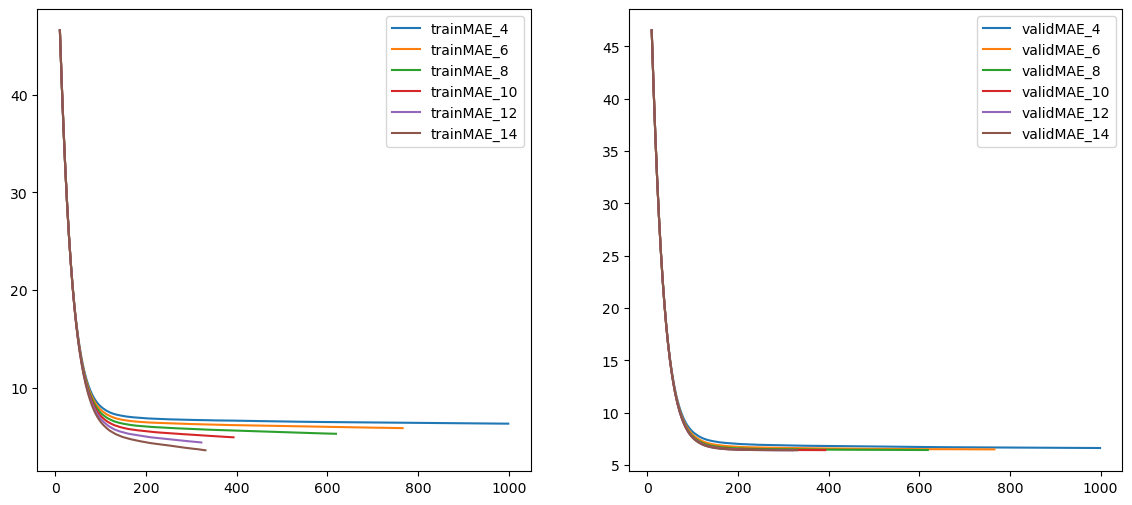

In [103]:
# Prepare the results object
resHists = dict()
rang = range(4,15,2)

best_rmse = float('inf')  # Initialize best_rmse to infinity
best_max_depth = None  # Initialize best_max_depth to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=x, early_stopping_rounds=10, debug=False)
    resHists[x]=train_history
    print("Max depth: ", x)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train MAE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid MAE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_max_depth if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_max_depth = x

    print("\n")

print("Best max_depth: ", best_max_depth)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

Subsample:  0.3
Score:  6.470832032861804
Train MAE:  4.808859569708326
Valid MAE:  6.477051486594156


Subsample:  0.4
Score:  6.460993854006582
Train MAE:  4.499488414753051
Valid MAE:  6.465051924740827


Subsample:  0.5
Score:  6.442535410842837
Train MAE:  4.45511040734641
Valid MAE:  6.445884499510219


Subsample:  0.6
Score:  6.431424954220461
Train MAE:  4.3193080507708785
Valid MAE:  6.433510917474713


Subsample:  0.7
Score:  6.420570623487212
Train MAE:  4.276926280948941
Valid MAE:  6.422526943260129


Subsample:  0.8
Score:  6.399488156074299
Train MAE:  4.0901237644441
Valid MAE:  6.4027438124111


Subsample:  0.9
Score:  6.400278064939711
Train MAE:  3.9489192223501584
Valid MAE:  6.402992761234217


Best subsample:  0.8
Best MAE:  6.4027438124111


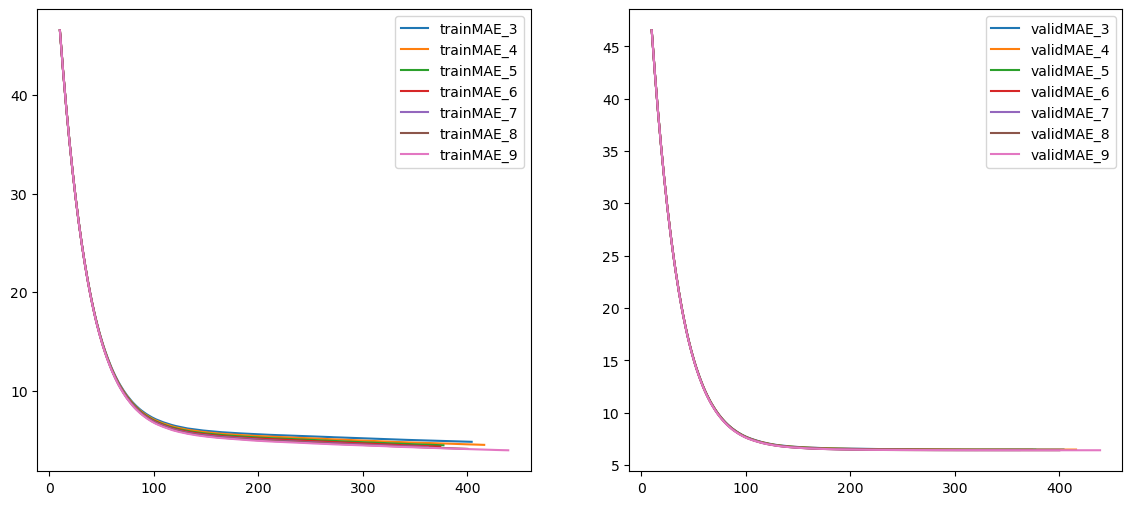

In [104]:
#rows
# Prepare the results object
resHists = dict()
rang = range(3,10)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_subsample = None  # Initialize best_subsample to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=12,  subsample=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    subsample_value = x/10
    print("Subsample: ", subsample_value)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train MAE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid MAE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_subsample if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_subsample = subsample_value

    print("\n")

print("Best subsample: ", best_subsample)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

Colsample_bytree:  0.3
Score:  6.481384322396392
Train MAE:  4.042079729822803
Valid MAE:  6.48222047203162


Colsample_bytree:  0.4
Score:  6.444630134493135
Train MAE:  3.8684733478874755
Valid MAE:  6.446350557373404


Colsample_bytree:  0.5
Score:  6.427219551436755
Train MAE:  3.904893672604815
Valid MAE:  6.432547683348191


Colsample_bytree:  0.6
Score:  6.410666620019522
Train MAE:  4.042840682077119
Valid MAE:  6.41443658181419


Colsample_bytree:  0.7
Score:  6.399488156074299
Train MAE:  4.0901237644441
Valid MAE:  6.4027438124111


Colsample_bytree:  0.8
Score:  6.4282558185983945
Train MAE:  3.8547538235073997
Valid MAE:  6.4352854237084305


Colsample_bytree:  0.9
Score:  6.4414728833974895
Train MAE:  3.7944596735697216
Valid MAE:  6.442585348812631


Best colsample_bytree:  0.7
Best MAE:  6.4027438124111


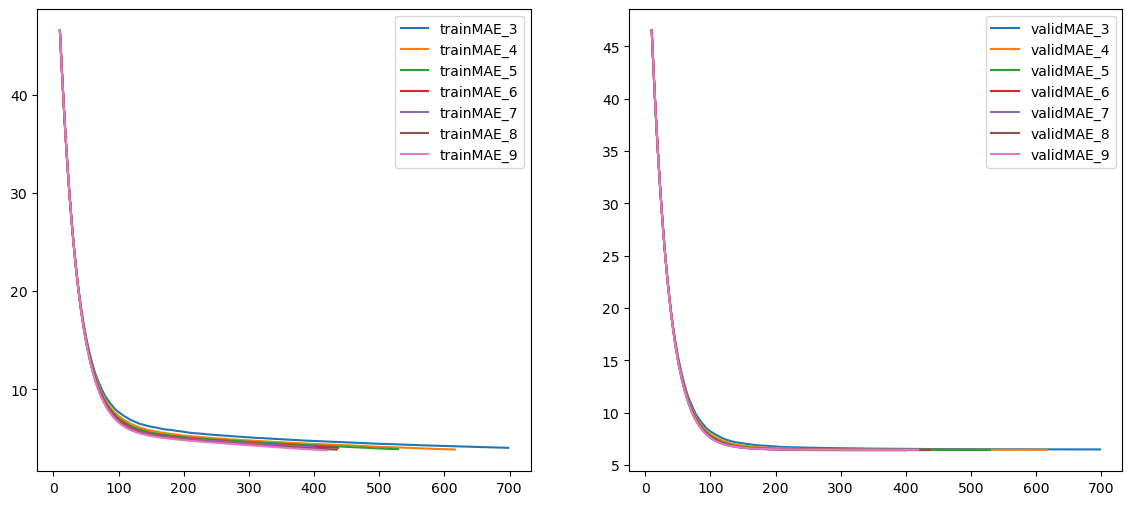

In [105]:
# Prepare the results object
resHists = dict()
rang = range(3,10)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_colsample_bytree = None  # Initialize best_colsample_bytree to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=12, subsample=0.8, colsample_bytree=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    colsample_bytree_value = x/10
    print("Colsample_bytree: ", colsample_bytree_value)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train MAE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid MAE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_colsample_bytree if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_colsample_bytree = colsample_bytree_value

    print("\n")

print("Best colsample_bytree: ", best_colsample_bytree)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### colsample_byleve + bytree

Colsample_bylevel:  0.3
Score:  6.478353423956931
Train MAE:  4.2842259184933935
Valid MAE:  6.479334723111453


Colsample_bylevel:  0.4
Score:  6.451882653585997
Train MAE:  3.8289557606972986
Valid MAE:  6.453898407884917


Colsample_bylevel:  0.5
Score:  6.4334990415984
Train MAE:  3.896836285423755
Valid MAE:  6.437487418959741


Colsample_bylevel:  0.6
Score:  6.43196237979292
Train MAE:  4.26423790052995
Valid MAE:  6.4358494056505595


Colsample_bylevel:  0.7
Score:  6.423981884259305
Train MAE:  3.758478189046331
Valid MAE:  6.428231977100905


Colsample_bylevel:  0.8
Score:  6.412719759000402
Train MAE:  4.0654413811271155
Valid MAE:  6.415884714998806


Colsample_bylevel:  0.9
Score:  6.413920351166844
Train MAE:  4.014202691259838
Valid MAE:  6.417308582650471


Colsample_bylevel:  1.0
Score:  6.399488156074299
Train MAE:  4.0901237644441
Valid MAE:  6.4027438124111


Best colsample_bylevel:  1.0
Best MAE:  6.4027438124111


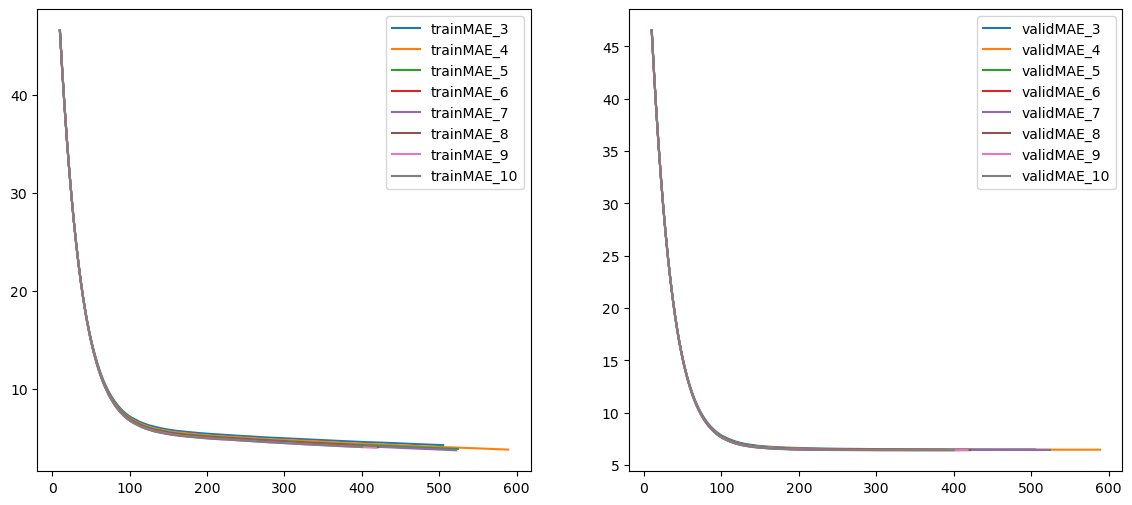

In [106]:
# Prepare the results object
resHists = dict()
rang = range(3,11)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_colsample_bylevel = None  # Initialize best_colsample_bylevel to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=12, subsample=0.8, colsample_bytree=0.7, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    colsample_bylevel_value = x/10
    print("Colsample_bylevel: ", colsample_bylevel_value)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train MAE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid MAE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_colsample_bylevel if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_colsample_bylevel = colsample_bylevel_value

    print("\n")

print("Best colsample_bylevel: ", best_colsample_bylevel)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()


### Regularyzacja L2

Reg_lambda:  0
Score:  6.444967426860864
Train MAE:  3.681949663499
Valid MAE:  6.450786806108009


Reg_lambda:  1
Score:  6.399488156074299
Train MAE:  4.0901237644441
Valid MAE:  6.4027438124111


Reg_lambda:  4
Score:  6.407234485998175
Train MAE:  4.00242532151086
Valid MAE:  6.408178018424336


Reg_lambda:  9
Score:  6.409325155090944
Train MAE:  4.27600907342324
Valid MAE:  6.412974562684605


Reg_lambda:  16
Score:  6.40466980148425
Train MAE:  4.4207076866880834
Valid MAE:  6.4084611791421855


Reg_lambda:  25
Score:  6.408203272232033
Train MAE:  4.622339082773401
Valid MAE:  6.414122052563922


Reg_lambda:  36
Score:  6.412550623634956
Train MAE:  4.781744099618446
Valid MAE:  6.413854491052894


Reg_lambda:  49
Score:  6.417358725880098
Train MAE:  4.964894954174284
Valid MAE:  6.418936256378416


Best reg_lambda:  1
Best MAE:  6.4027438124111


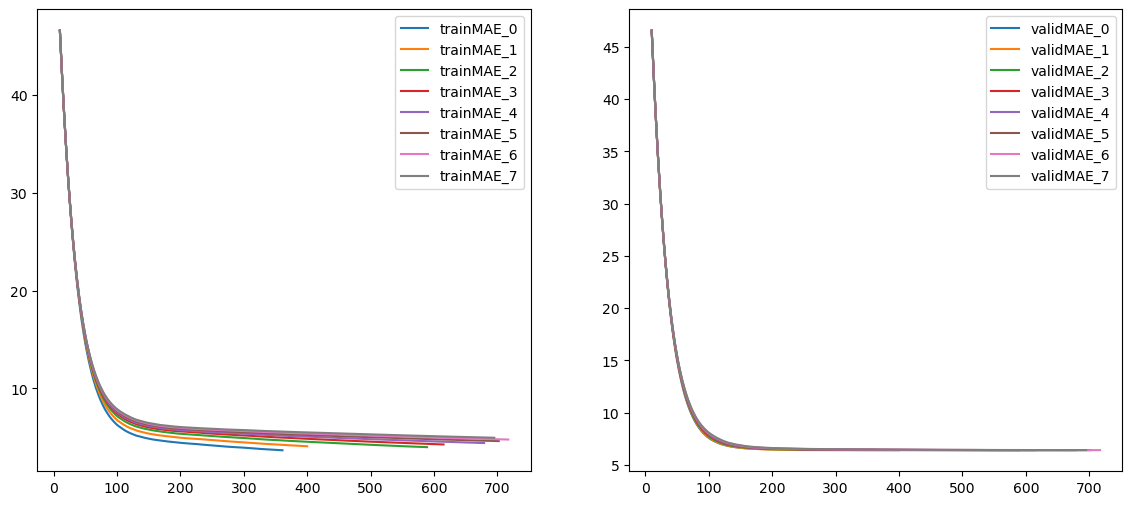

In [109]:
# Prepare the results object
resHists = dict()
rang = range(0,8)

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_reg_lambda = None  # Initialize best_reg_lambda to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=x**2,
                                                          max_depth=12, subsample=0.8, colsample_bytree=0.7,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    reg_lambda_value = x**2
    print("Reg_lambda: ", reg_lambda_value)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train MAE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid MAE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_reg_lambda if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_reg_lambda = reg_lambda_value

    print("\n")

print("Best reg_lambda: ", best_reg_lambda)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### Gamma

Gamma:  0
Score:  6.399488156074299
Train RMSE:  4.0901237644441
Valid RMSE:  6.4027438124111


Gamma:  0.01
Score:  6.408118405670085
Train RMSE:  4.033217161398266
Valid RMSE:  6.4092965030526


Gamma:  0.1
Score:  6.402380237954183
Train RMSE:  4.109472152113193
Valid RMSE:  6.405847618639334


Gamma:  0.5
Score:  6.400645253519532
Train RMSE:  4.0128496431675895
Valid RMSE:  6.401286781149566


Gamma:  1
Score:  6.390741725627527
Train RMSE:  4.104889693207482
Valid RMSE:  6.393471829925445


Gamma:  2
Score:  6.403554192295781
Train RMSE:  4.109031601163445
Valid RMSE:  6.407400382439115


Gamma:  5
Score:  6.39813975898587
Train RMSE:  4.195586903712016
Valid RMSE:  6.39998471908108


Best gamma:  1
Best MAE:  6.393471829925445


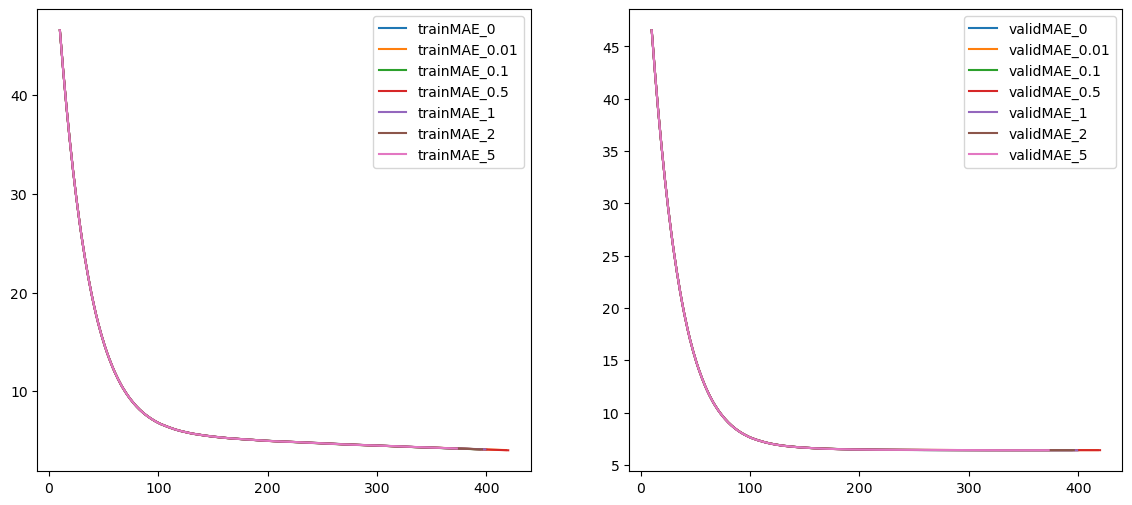

In [112]:
# Prepare the results object
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]

best_rmse = float('inf')  # Initialize best_rmse to positive infinity
best_gamma = None  # Initialize best_gamma to None

# Test the model for different hyperparameter values:
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=1,
                                                          max_depth=12, subsample=0.8, colsample_bytree=0.7,
                                                          gamma=x,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print("Gamma: ", x)
    print("Score: ", score)
    train_rmse = train_history['trainMAE'].iloc[-1]
    valid_rmse = train_history['validMAE'].iloc[-1]
    print("Train RMSE: ", train_rmse) # Training RMSE of the last iteration
    print("Valid RMSE: ", valid_rmse) # Validation RMSE of the last iteration

    # Update best_rmse and best_gamma if the current model's validation RMSE is lower than the best_rmse
    if valid_rmse < best_rmse:
        best_rmse = valid_rmse
        best_gamma = x

    print("\n")

print("Best gamma: ", best_gamma)
print("Best MAE: ", best_rmse)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# For readability of the plots, we will look at the history after 10 observations
for x in rang:
    resHists[x][['trainMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validMAE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

In [113]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare a simple wrapper
def CVTestXGB(nFolds = 5, randomState=2020, features=features, debug=False, *args, **kwargs):
    
    # Prepare cross-validation
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Save results from the training and test set
    testResults = []
    trainResults = []
    
    # Also keep predictions for individual folds
    predictions = []
    
    # Along with information about their index in the original data set
    indices = []
    
    # Prepare a list of histories
    hists = []
    fold = 1
    for train, test in kf.split(df.index.values):
        # Prepare the estimator
        score, trainPred, testPred, train_history, impFig, imp = run_xgb(df.iloc[train], df.iloc[test],
                                                                         features, target, debug=debug, *args, **kwargs)

        # Keep information about predictions for this fold
        predictions.append(testPred.tolist().copy())
        
        # Along with indices in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Reporting on each fold along with training results can optionally be displayed during
        trainScore = np.sqrt(mean_squared_error(df[target].iloc[train], trainPred))
        testScore = np.sqrt(mean_squared_error(df[target].iloc[test], testPred))
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        hists.append(train_history.add_suffix('_'+str(fold)))
        fold+=1
        
        if debug:
            print("Train MAE:", trainScore,
                  "Valid MAE:", testScore)
        
    return trainResults, testResults, predictions, indices, pd.concat(hists, axis=1)

In [ ]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
    max_depth=12, reg_lambda=1, subsample=0.8, colsample_bytree=0.7, gamma=, debug=False)
np.mean(trainResults), np.mean(testResults)